In [1]:
from Agent import *

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
baselineFlags = pd.read_csv("./data/baseline_solo_performance_flagRates.csv")

In [13]:
baselineFlags

Unnamed: 0     d=0.1    d=0.15     d=0.2    d=0.25     d=0.3     d=0.5
0     dim=10  0.971500  0.939333  0.865000  0.802200  0.729667  0.526600
1     dim=20  0.995500  0.981833  0.942125  0.864100  0.785250  0.555425
2     dim=30  0.999722  0.993630  0.962444  0.887156  0.801241  0.562000
3     dim=40  1.007125  1.002208  0.975156  0.906350  0.815563  0.563713
4     dim=50  1.008880  1.005120  0.982620  0.910544  0.822400  0.571800

In [24]:
dims = [10,20,30,40,50]
densities = [0.1, 0.15, 0.2, 0.25, 0.3, 0.5]

In [20]:
baselineFlags.iloc[0].values[1:]

array([0.9715000000000008, 0.939333333333334, 0.8649999999999999,
       0.8021999999999998, 0.7296666666666666, 0.5265999999999998],
      dtype=object)

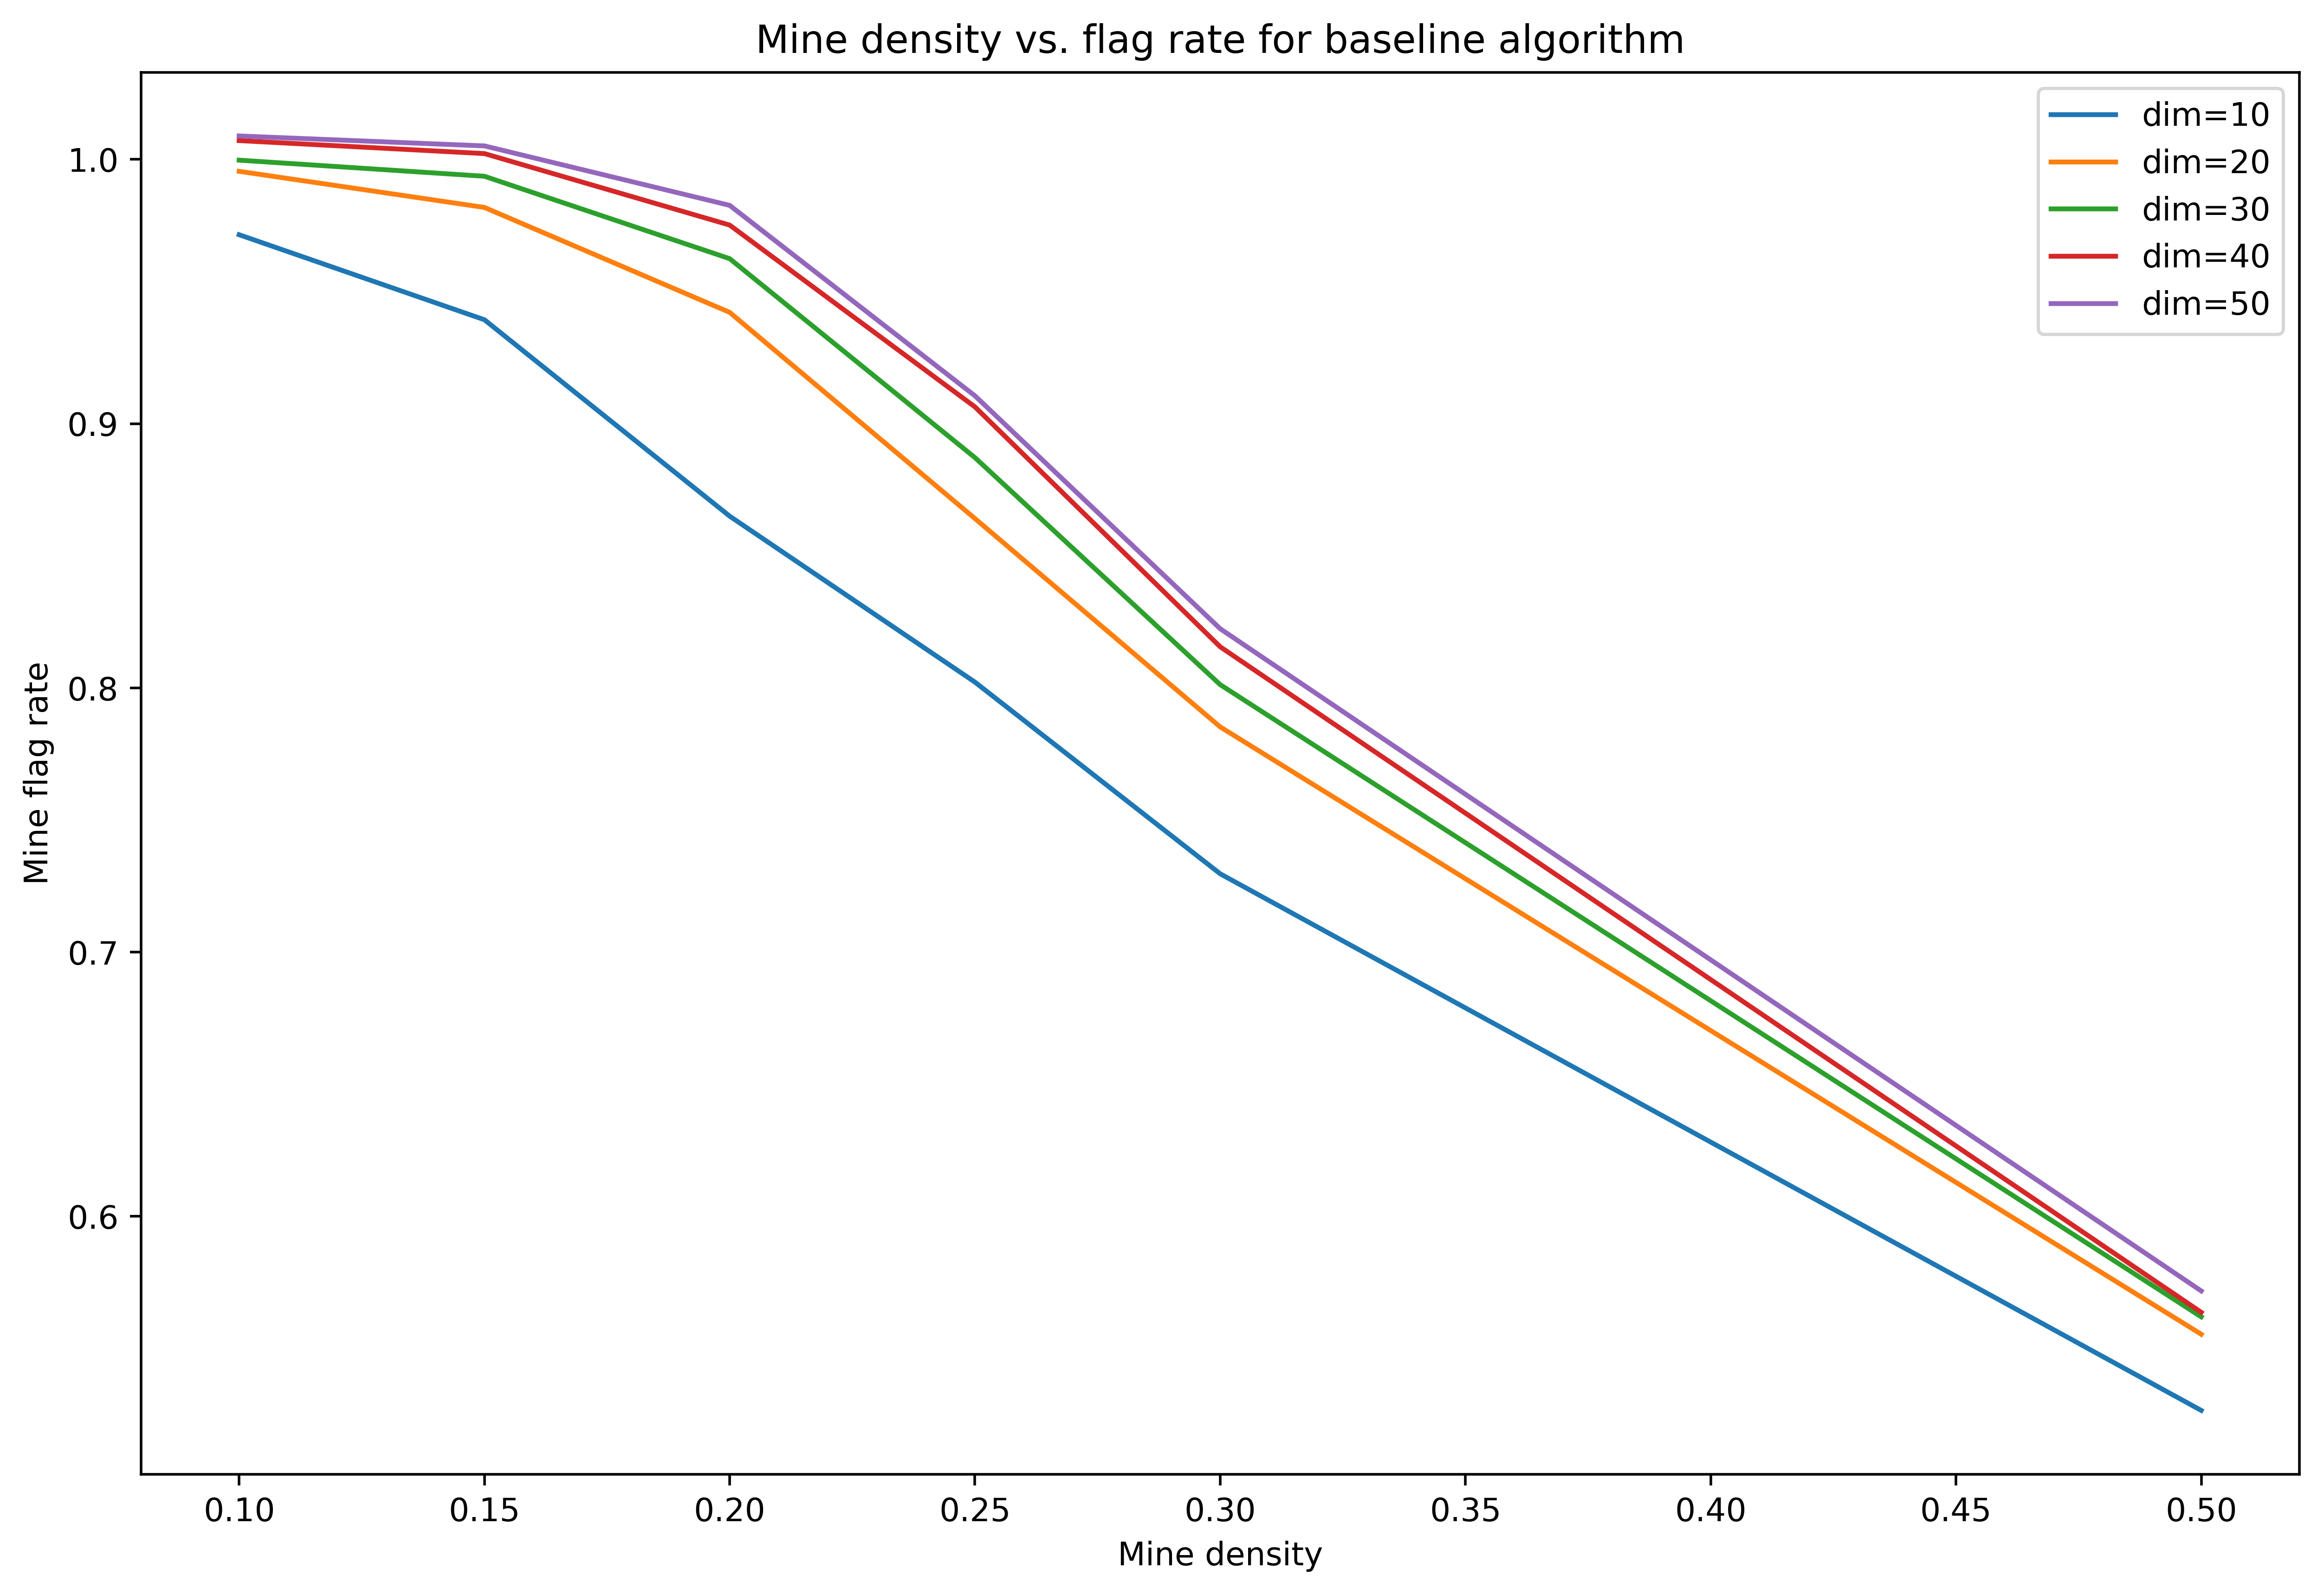

In [30]:
plt.figure(figsize=(12,8), dpi=500)



for i in range(5):
    plt.plot(densities, baselineFlags.iloc[i].values[1:])


plt.legend(['dim=10', 'dim=20', 'dim=30', 'dim=40', 'dim=50'])
plt.xlabel('Mine density')
plt.ylabel('Mine flag rate')
plt.title('Mine density vs. flag rate for baseline algorithm')
plt.savefig('./imgs/baseline_perf_flagRate.png')

In [33]:
baselineTimes = pd.read_csv('./data/baseline_solo_performance_times.csv')

In [35]:
baselineTimes

Unnamed: 0     d=0.1    d=0.15     d=0.2    d=0.25     d=0.3      d=0.5
0     dim=10  0.008125  0.011161  0.018602  0.020182  0.023605   0.027591
1     dim=20  0.041218  0.064340  0.146992  0.208602  0.288224   0.366105
2     dim=30  0.095811  0.192290  0.501797  0.964674  1.265326   1.775726
3     dim=40  0.181584  0.447265  1.297337  2.770875  3.816501   5.791174
4     dim=50  0.273127  0.701709  2.810102  6.401690  8.937176  13.768566

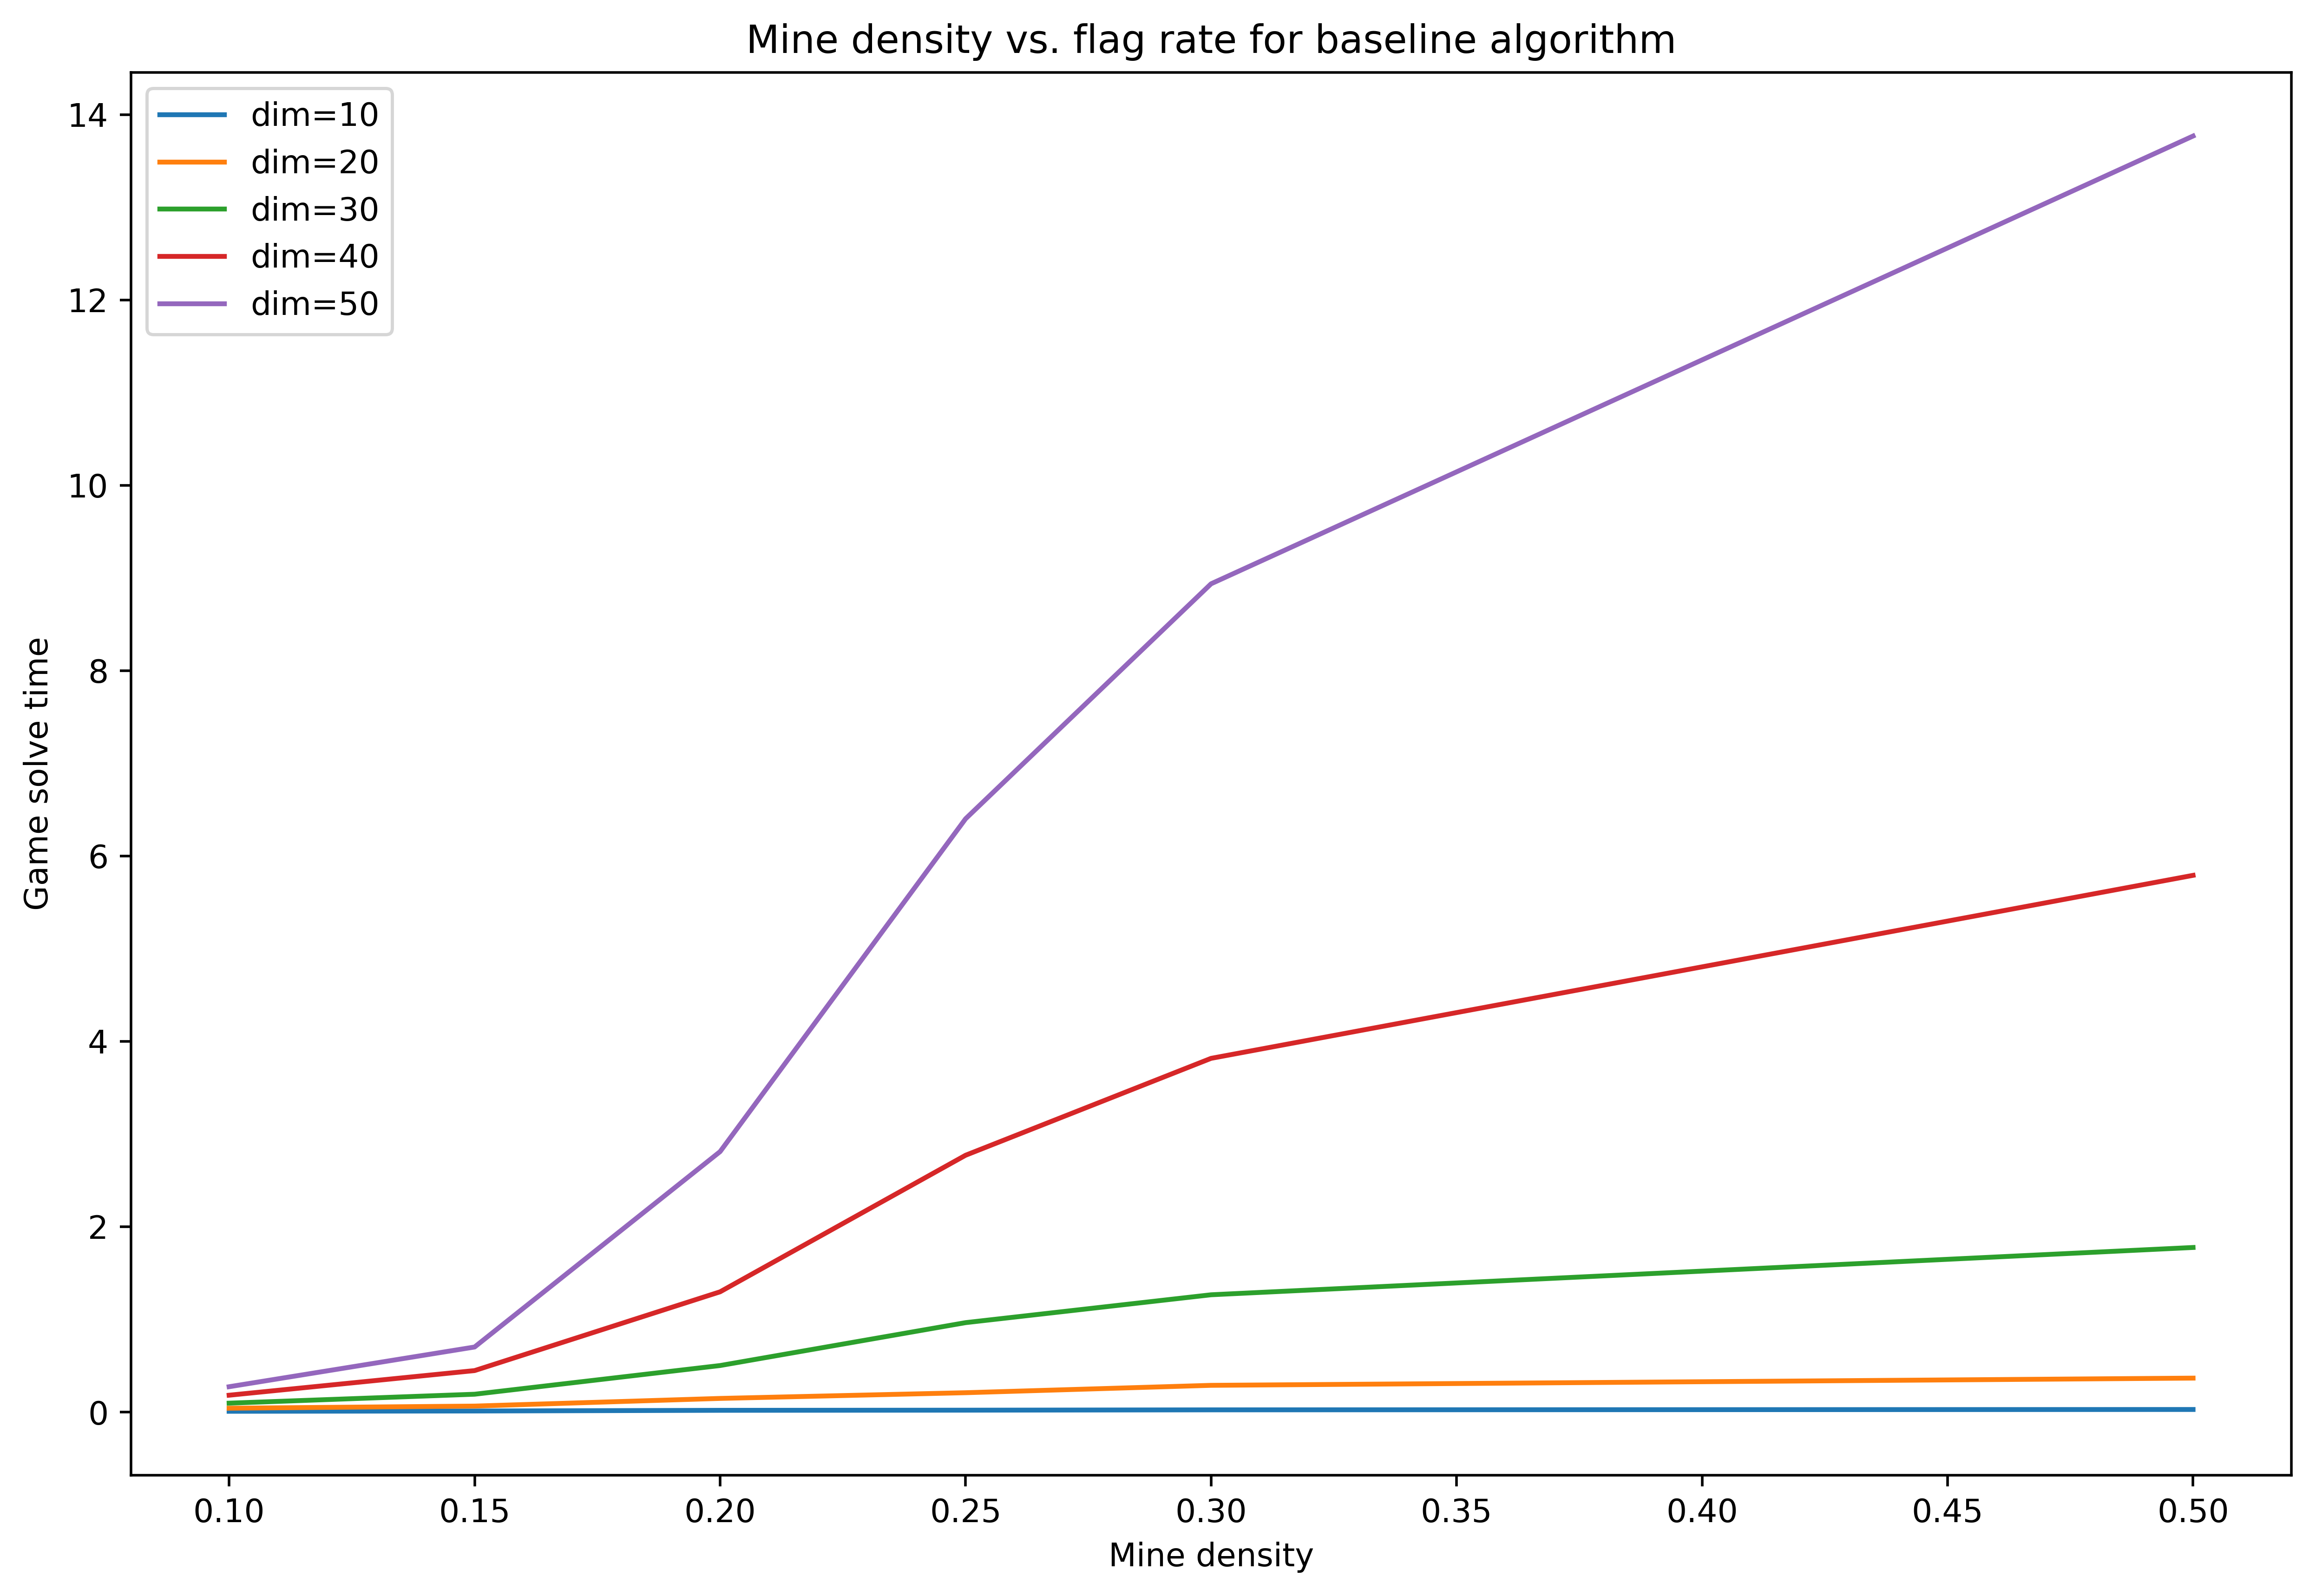

In [36]:
plt.figure(figsize=(12,8), dpi=500)



for i in range(5):
    plt.plot(densities, baselineTimes.iloc[i].values[1:])


plt.legend(['dim=10', 'dim=20', 'dim=30', 'dim=40', 'dim=50'])
plt.xlabel('Mine density')
plt.ylabel('Game solve time')
plt.title('Mine density vs. flag rate for baseline algorithm')
plt.savefig('./imgs/baseline_perf_solveTimes.png')

In [37]:
df = pd.read_excel("./data/comparisondata.xlsx",sheet_name=0,header=0).dropna()
df.style.hide_index()
base_linalg_df = df[['Dim', 'Density', 'Baseline', 'Lin Alg']]
base_linalg_df

Dim  Density  Baseline  Lin Alg
1   10.0      0.1      96.5     97.4
2   10.0      0.2      86.8     92.6
3   10.0      0.3      72.8     80.6
4   10.0      0.5      54.0     59.1
6   20.0      0.1      99.0     99.3
7   20.0      0.2      92.9     96.8
8   20.0      0.3      78.1     85.5
9   20.0      0.5      55.1     58.5
11  30.0      0.1      99.5     99.6
12  30.0      0.2      95.7     98.4
13  30.0      0.3      79.8     86.5
14  30.0      0.5      55.7     58.9
16  40.0      0.1      99.7     99.7
17  40.0      0.2      96.5     99.0
18  40.0      0.3      81.1     88.4
19  40.0      0.5      57.4     61.2

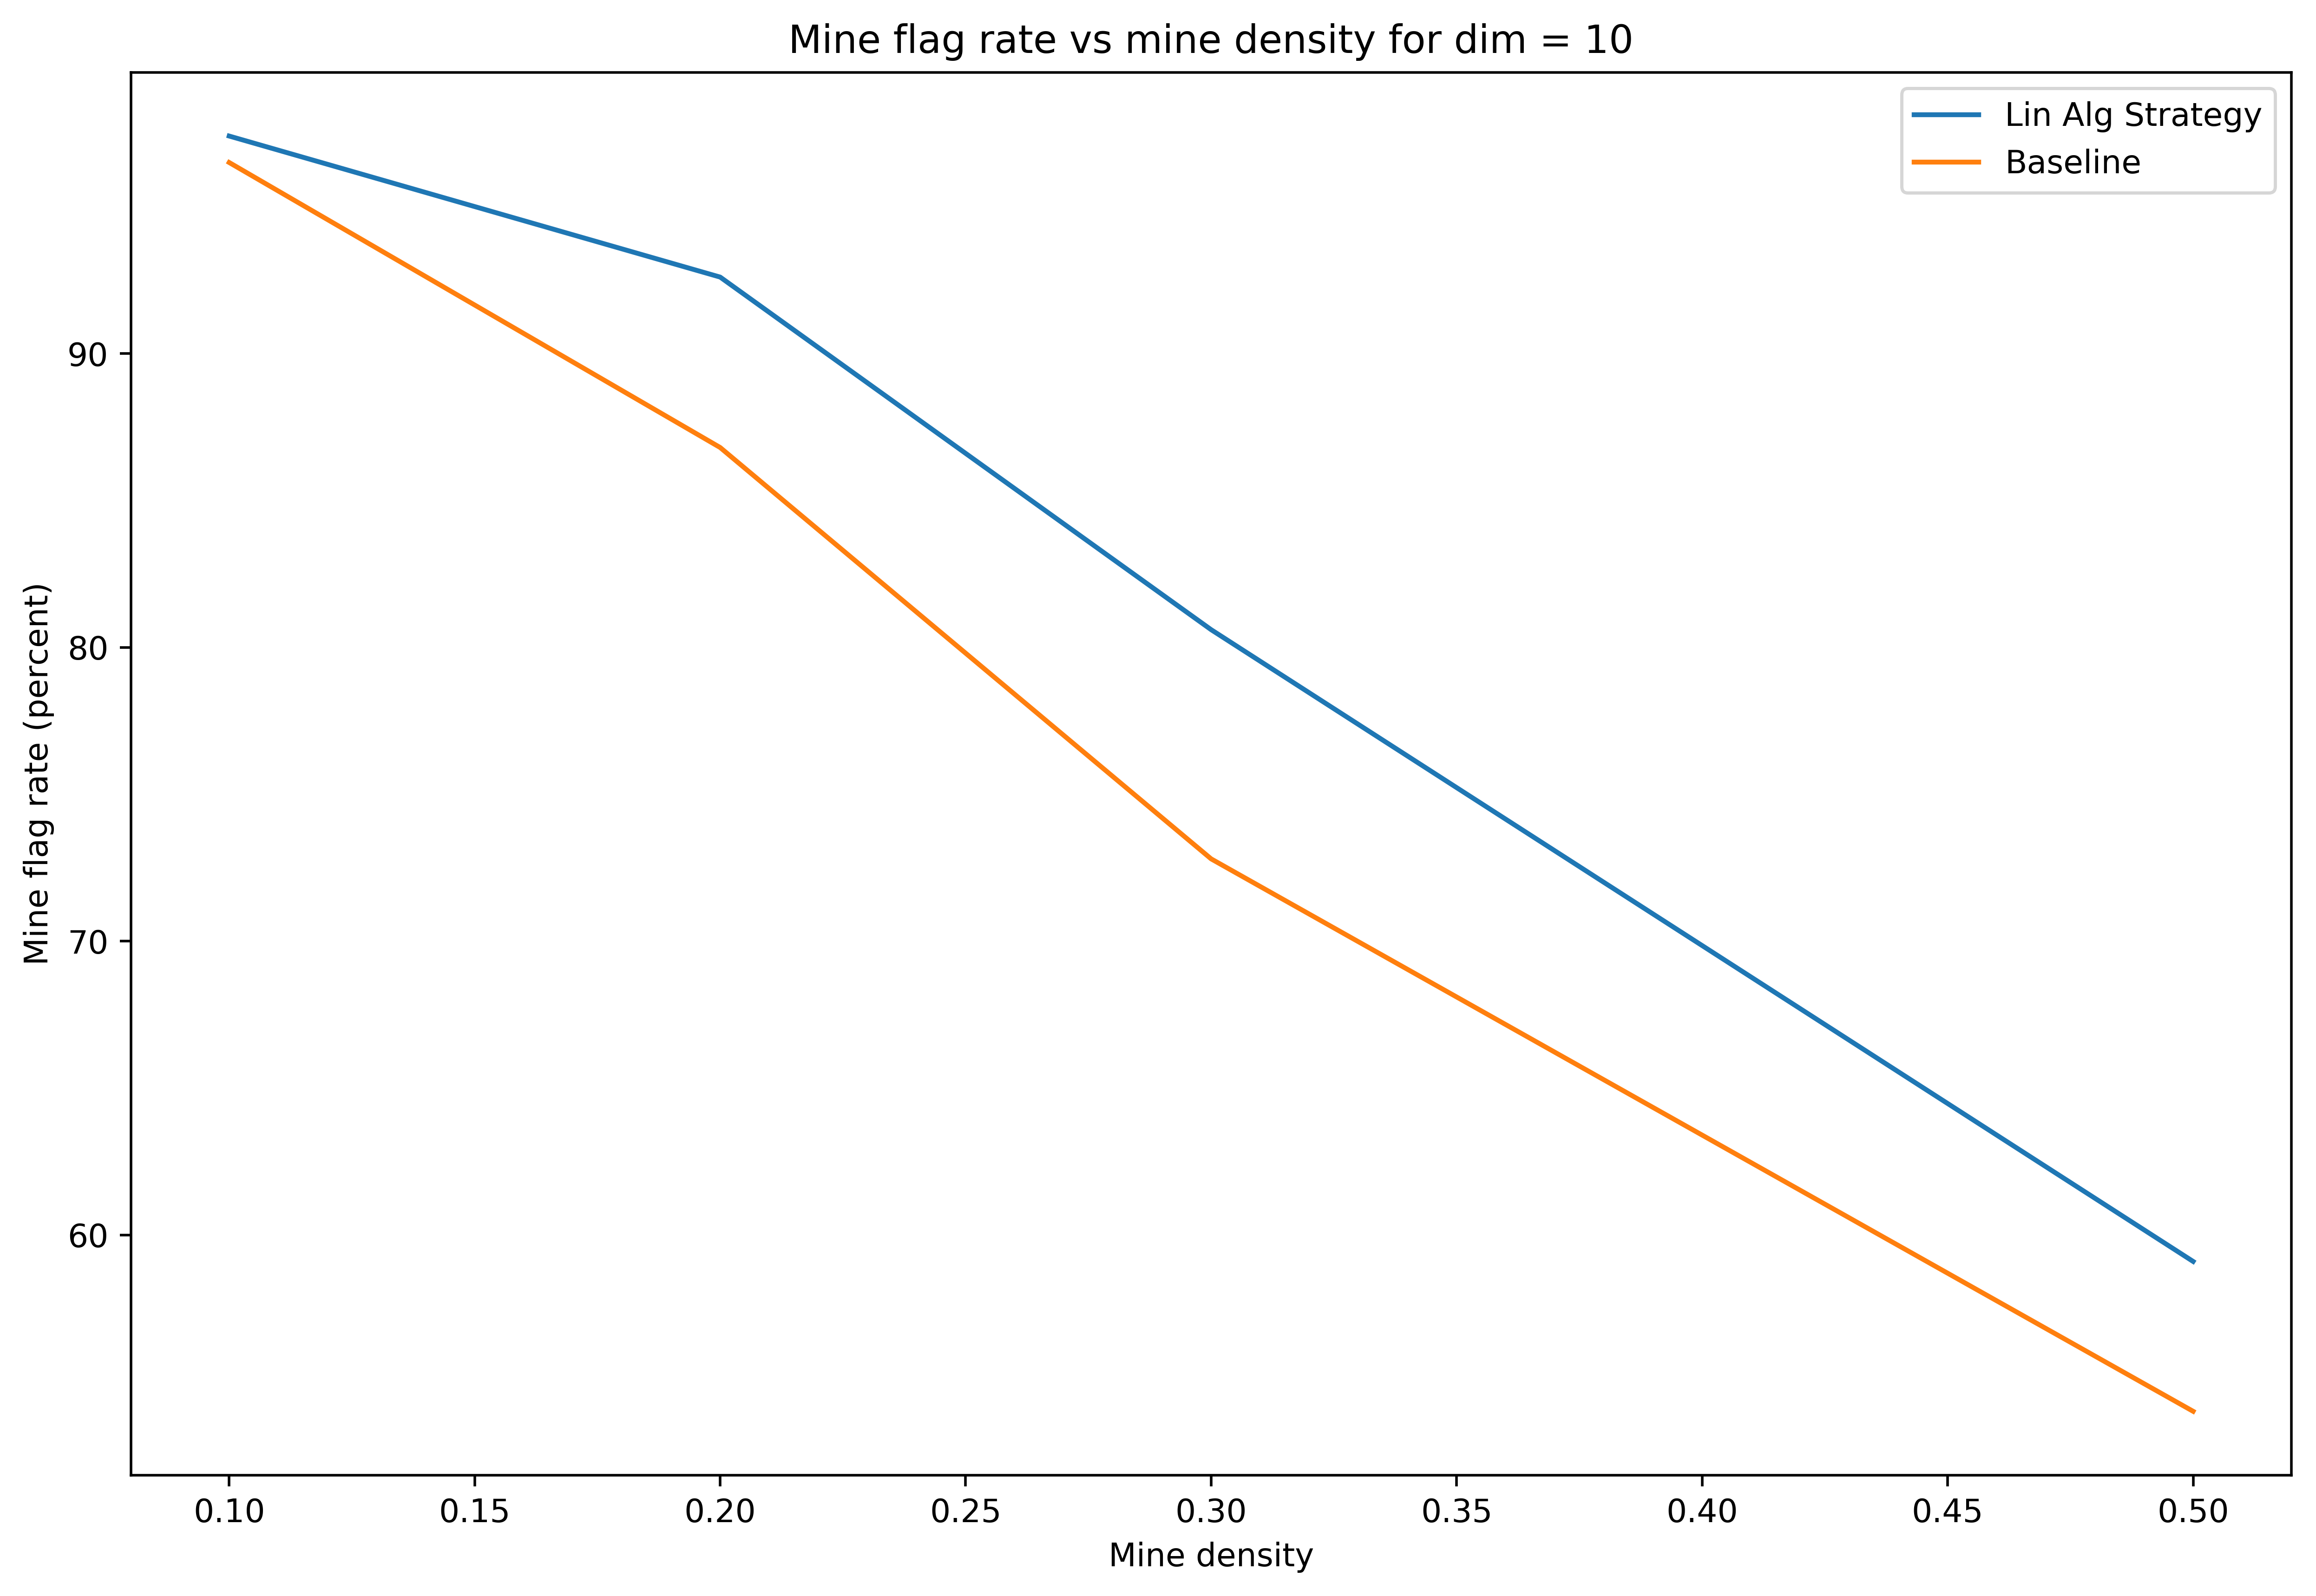

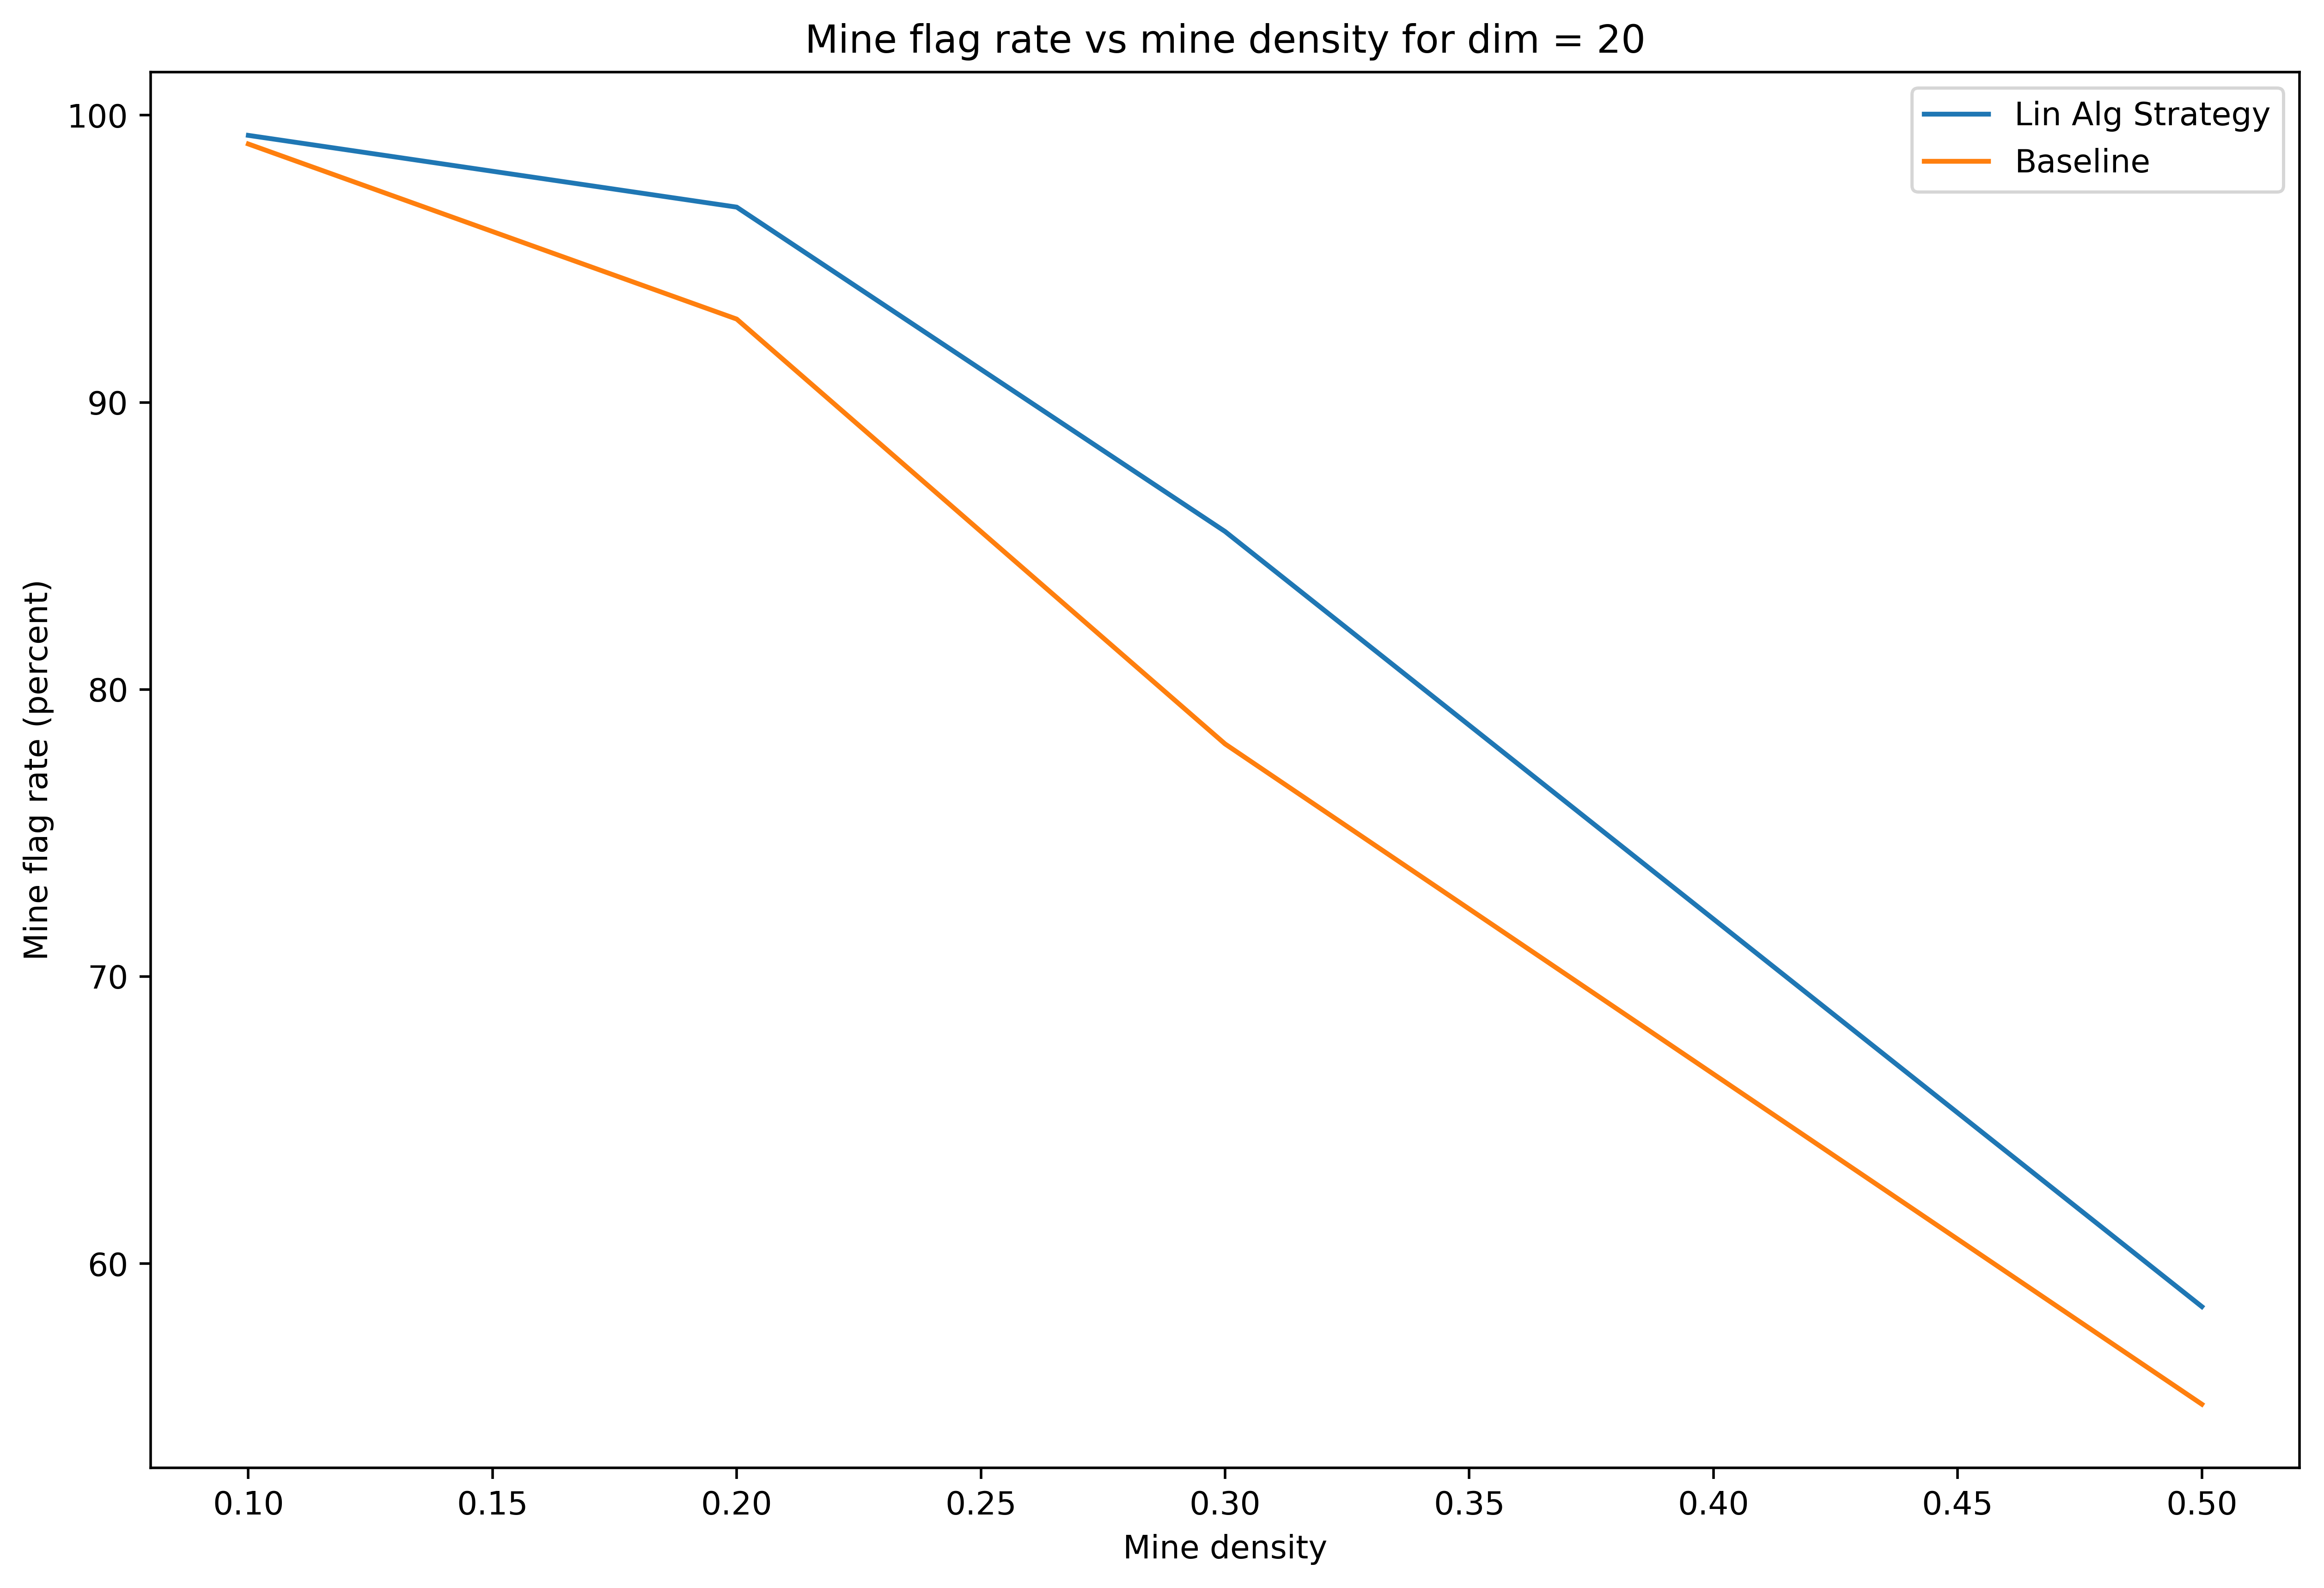

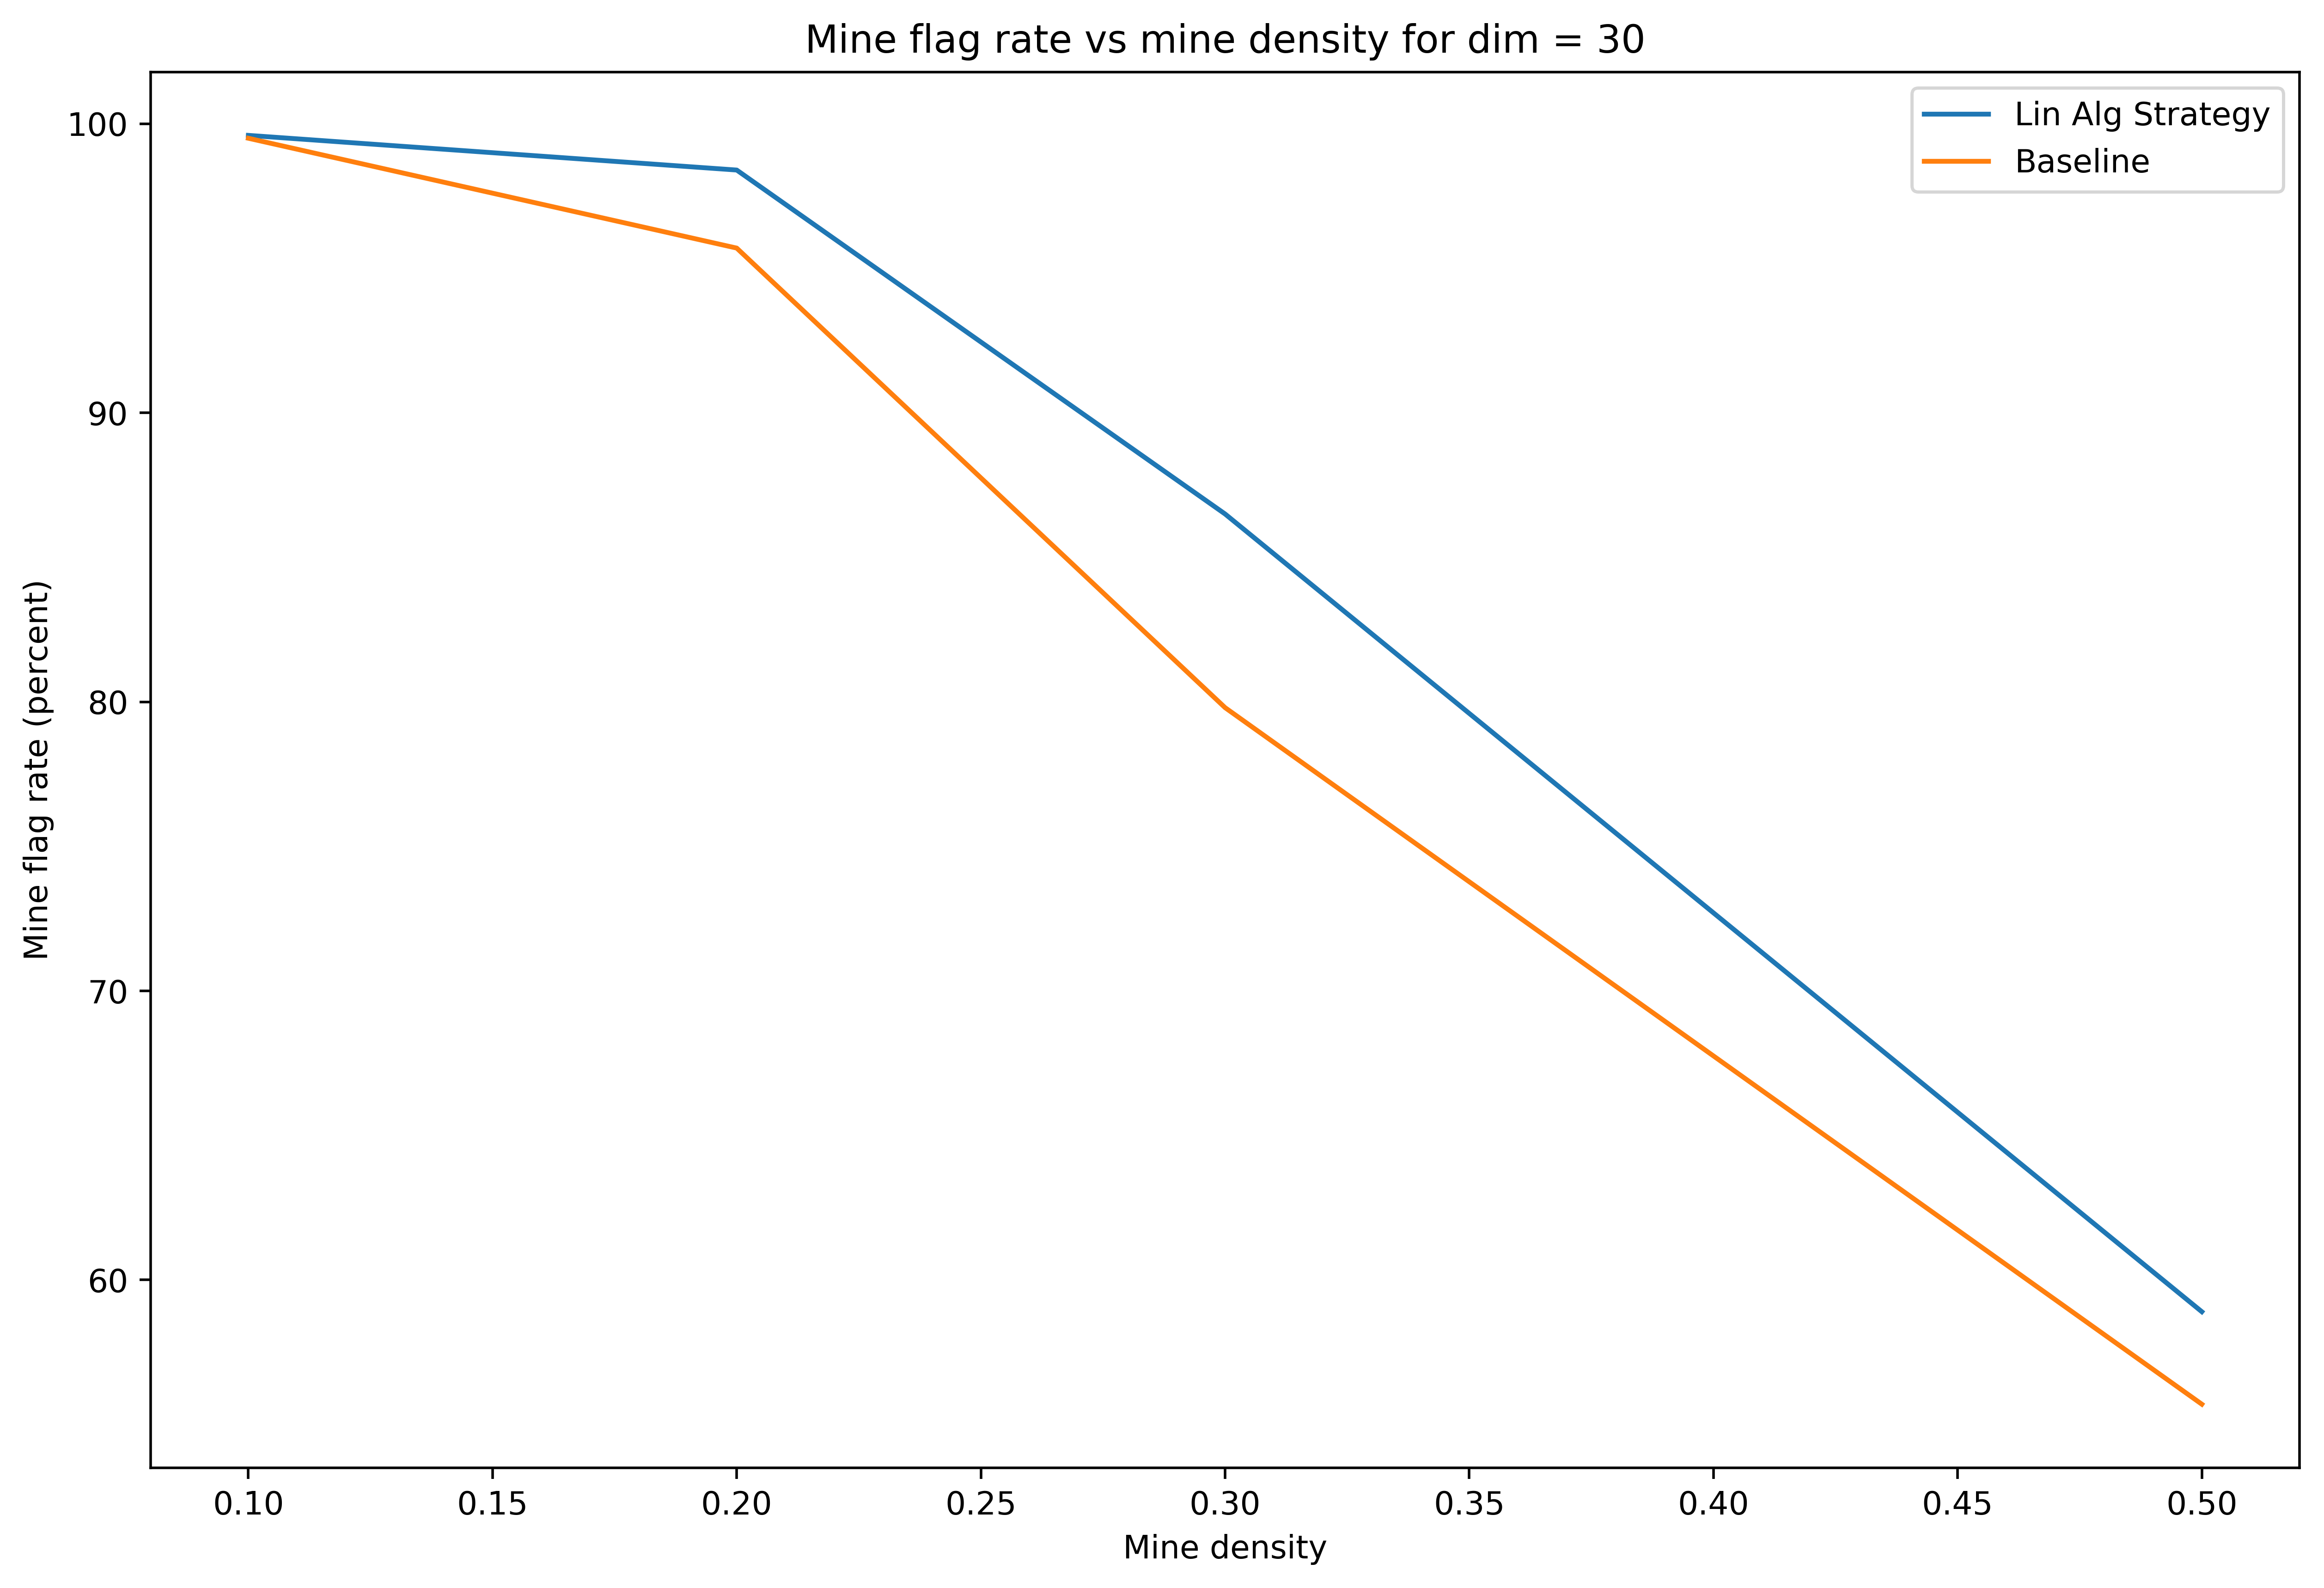

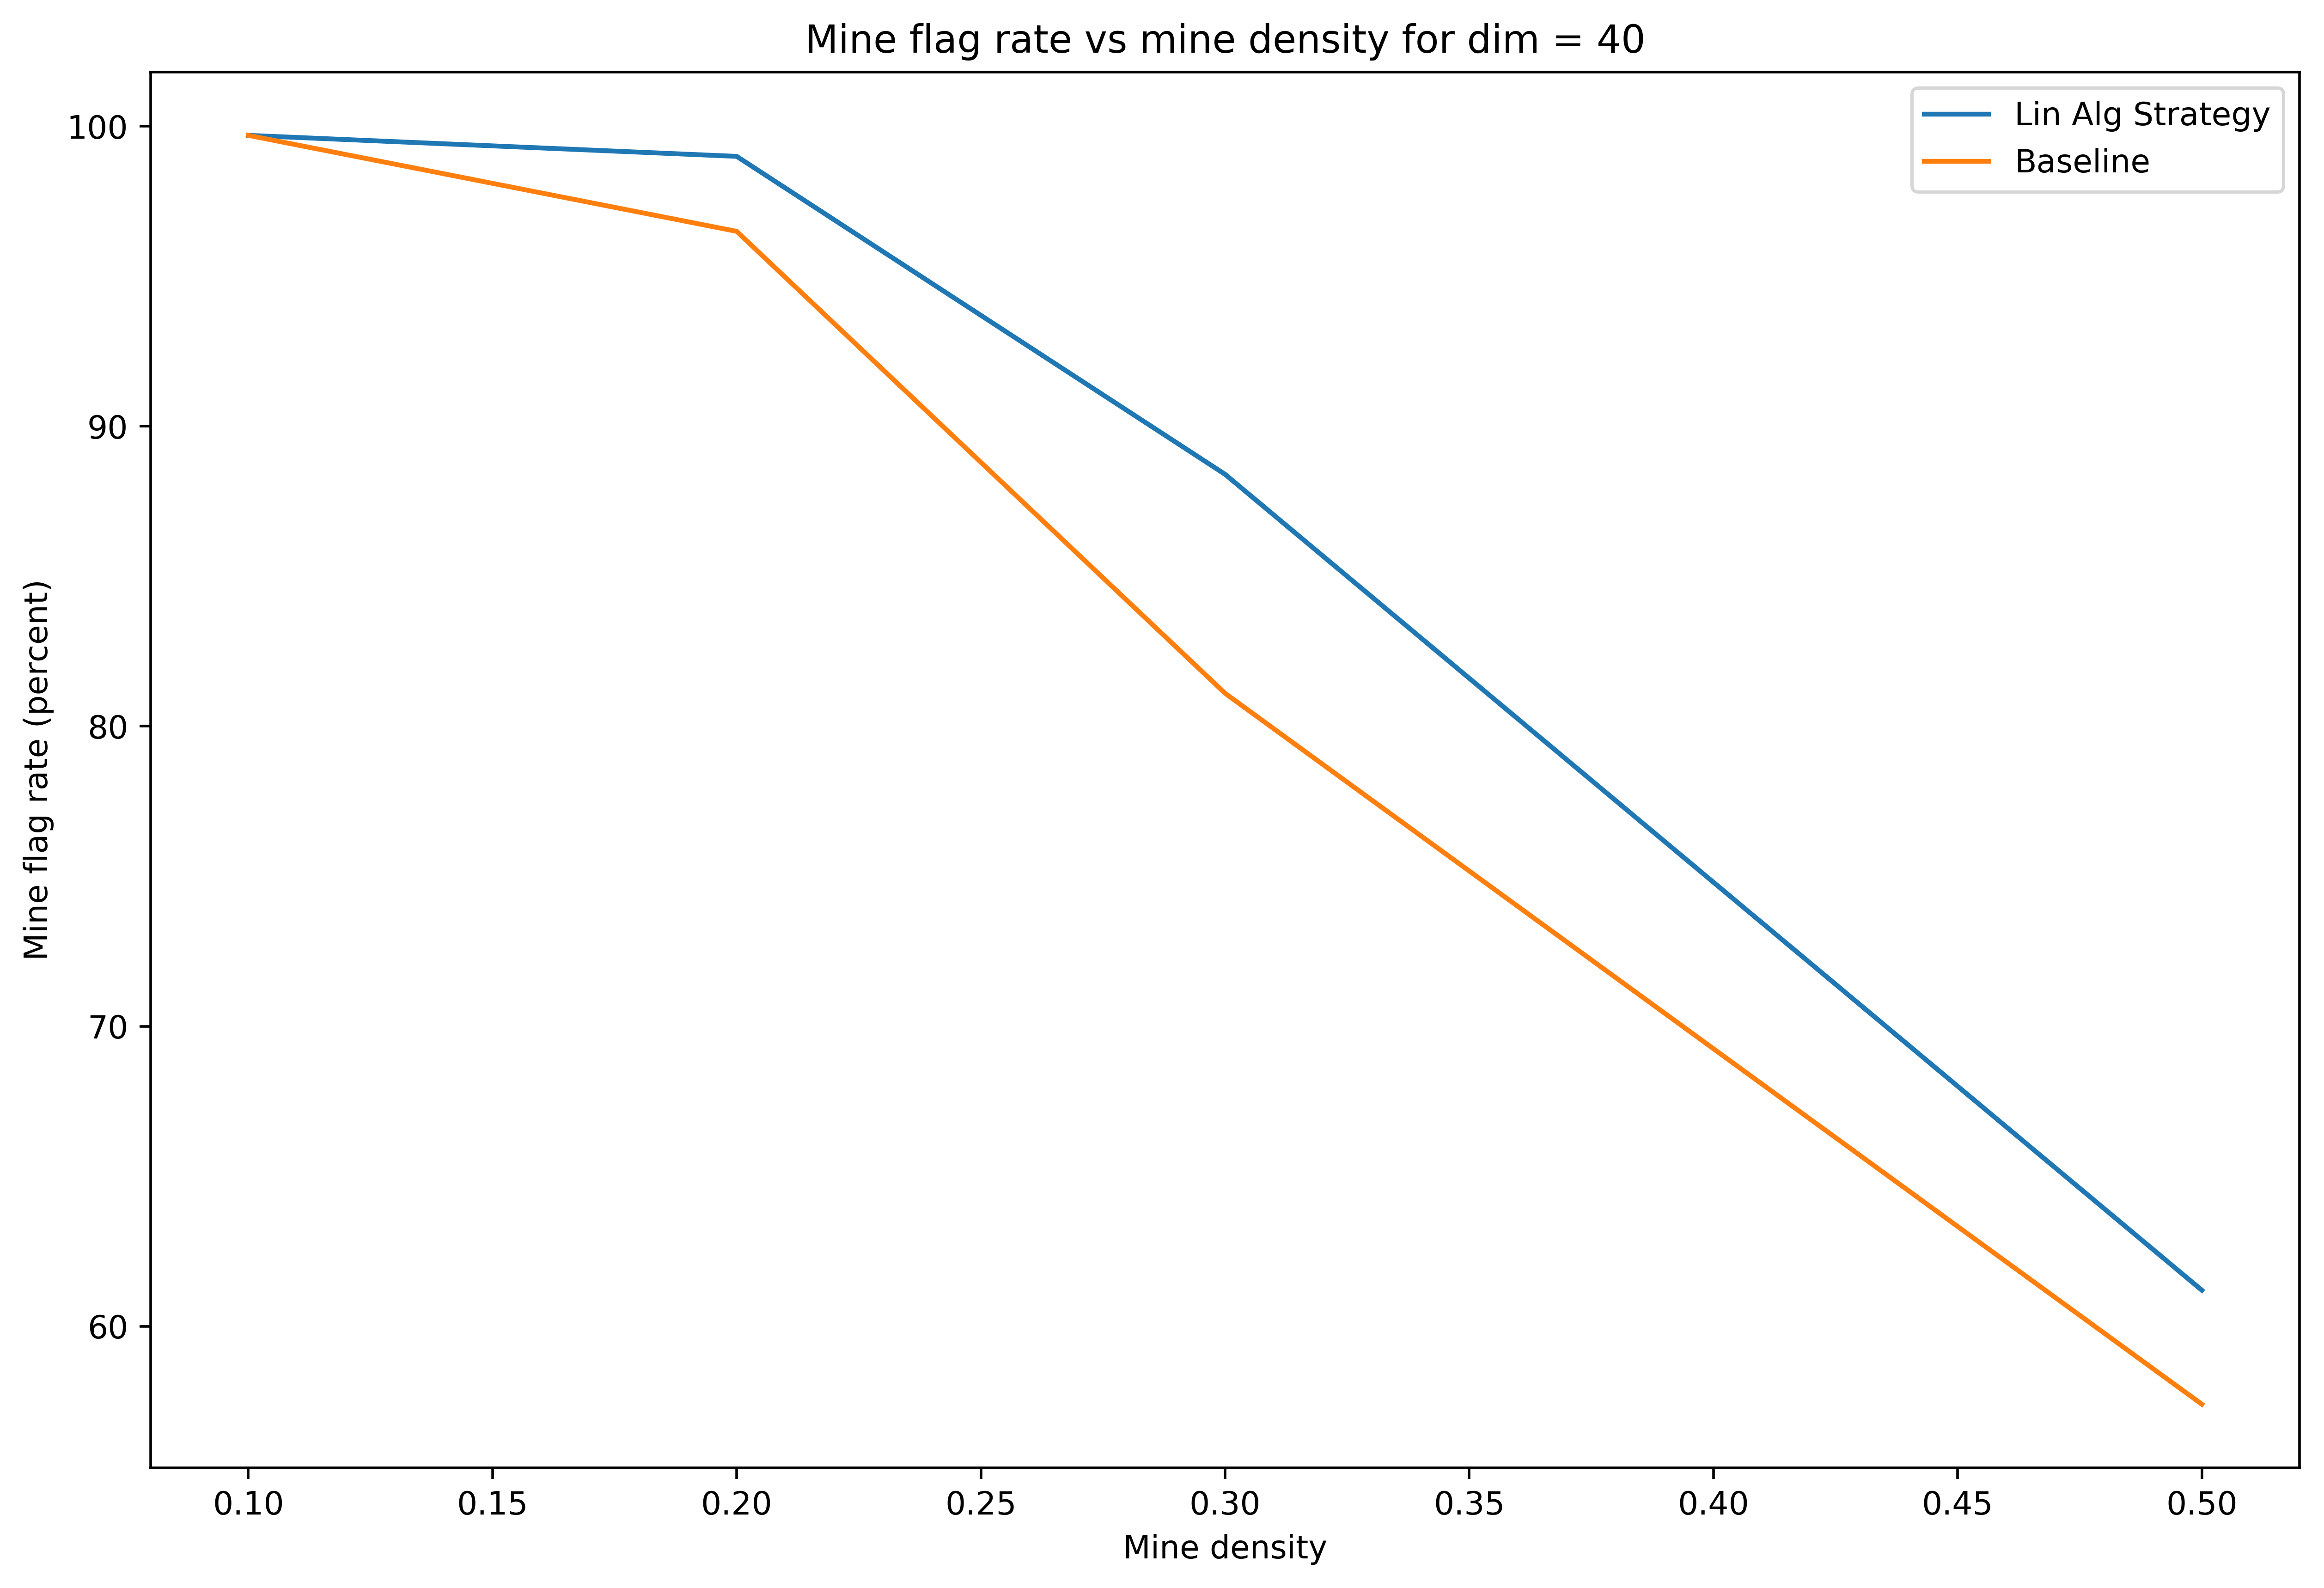

In [40]:
for dim in [10, 20, 30, 40]:
    plt.figure(figsize=(12,8), dpi=500)
    tmp = base_linalg_df[base_linalg_df['Dim'] == dim]
    
    plt.plot(tmp['Density'].values, tmp['Lin Alg'].values)
    plt.plot(tmp['Density'].values, tmp['Baseline'].values)
    
    plt.legend(['Lin Alg Strategy', 'Baseline'])
    
    plt.xlabel('Mine density')
    plt.ylabel('Mine flag rate (percent)')
    plt.title('Mine flag rate vs mine density for dim = {}'.format(dim))

    plt.savefig('./imgs/base_linalg_dim{}.png'.format(dim))

In [46]:
base_linalgBrute_df = df[['Dim', 'Density', 'Baseline', 'Lin Alg', 'Brute', 'Lin Alg + Brute']]
base_linalgBrute_df

Dim  Density  Baseline  Lin Alg  Brute  Lin Alg + Brute
1   10.0      0.1      96.5     97.4   97.3             97.4
2   10.0      0.2      86.8     92.6   93.0             94.3
3   10.0      0.3      72.8     80.6   83.9             87.2
4   10.0      0.5      54.0     59.1   69.8             70.5
6   20.0      0.1      99.0     99.3   99.3             99.3
7   20.0      0.2      92.9     96.8   96.4             97.9
8   20.0      0.3      78.1     85.5   86.9             91.4
9   20.0      0.5      55.1     58.5   71.9             73.9
11  30.0      0.1      99.5     99.6   99.6             99.6
12  30.0      0.2      95.7     98.4   98.0             99.2
13  30.0      0.3      79.8     86.5   87.2             92.2
14  30.0      0.5      55.7     58.9   71.6             75.1
16  40.0      0.1      99.7     99.7   99.7             99.7
17  40.0      0.2      96.5     99.0   98.5             99.4
18  40.0      0.3      81.1     88.4   88.0             93.2
19  40.0      0.5      57.4     61.2   74.2             77.9

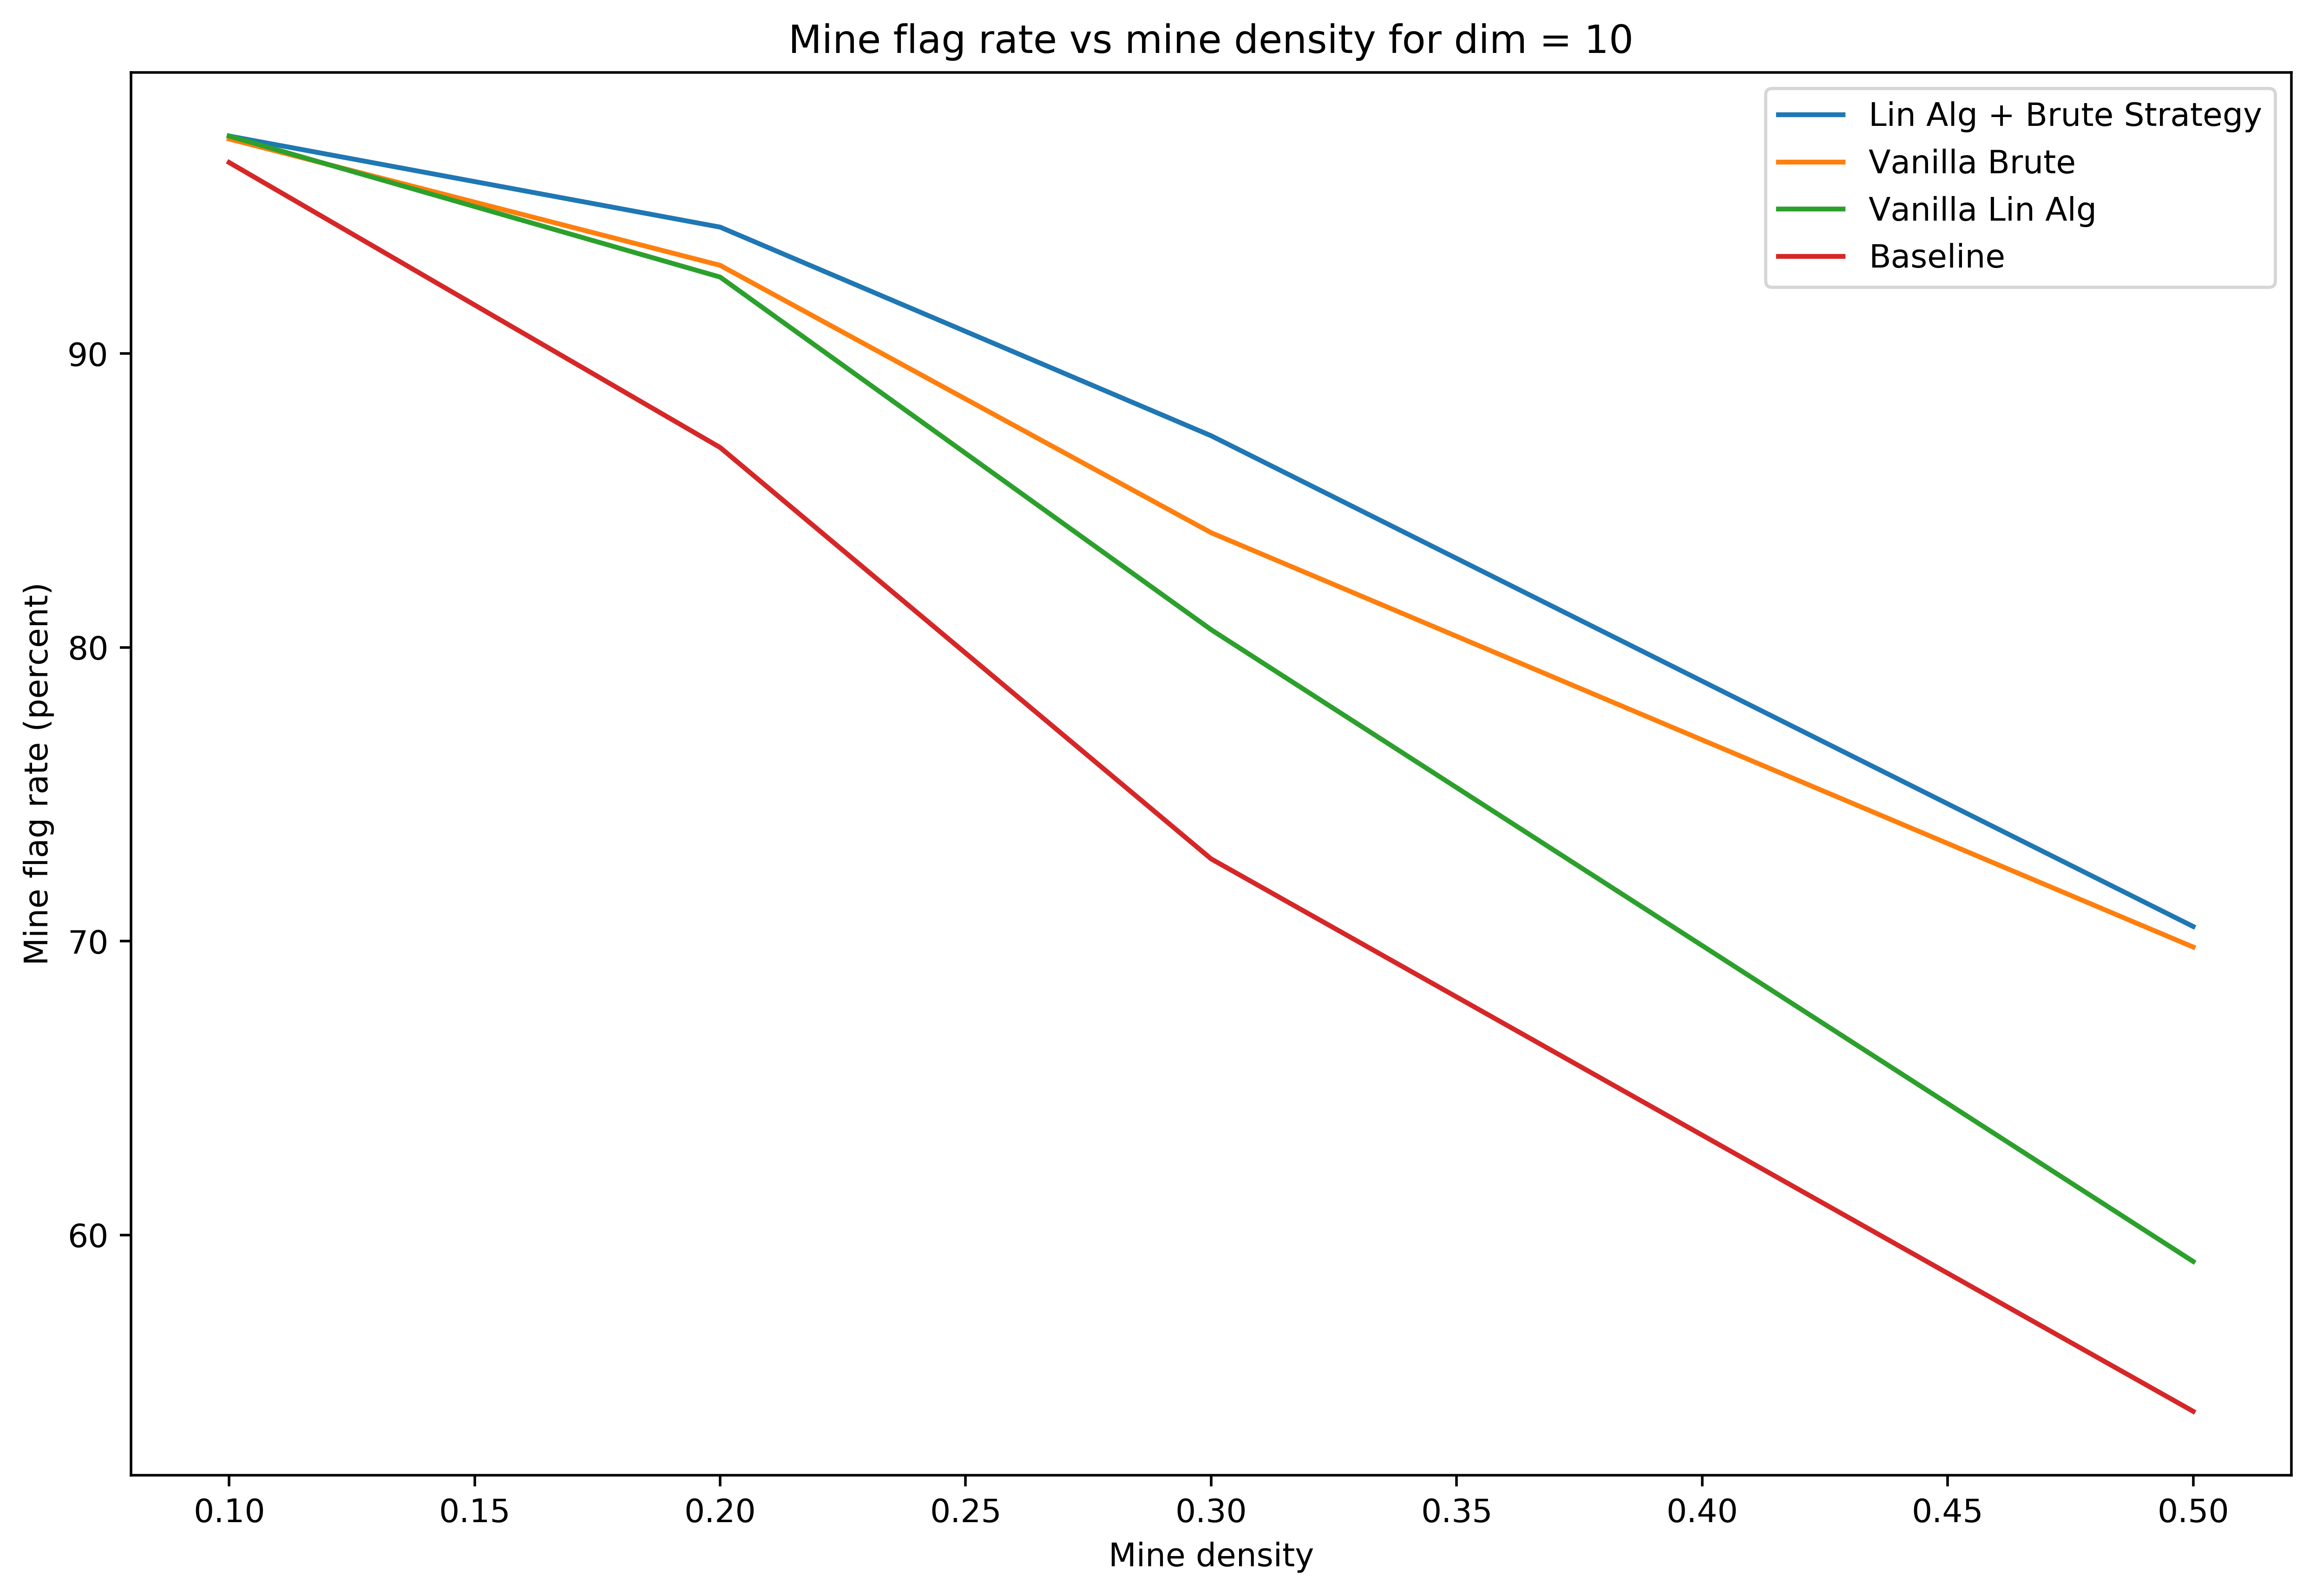

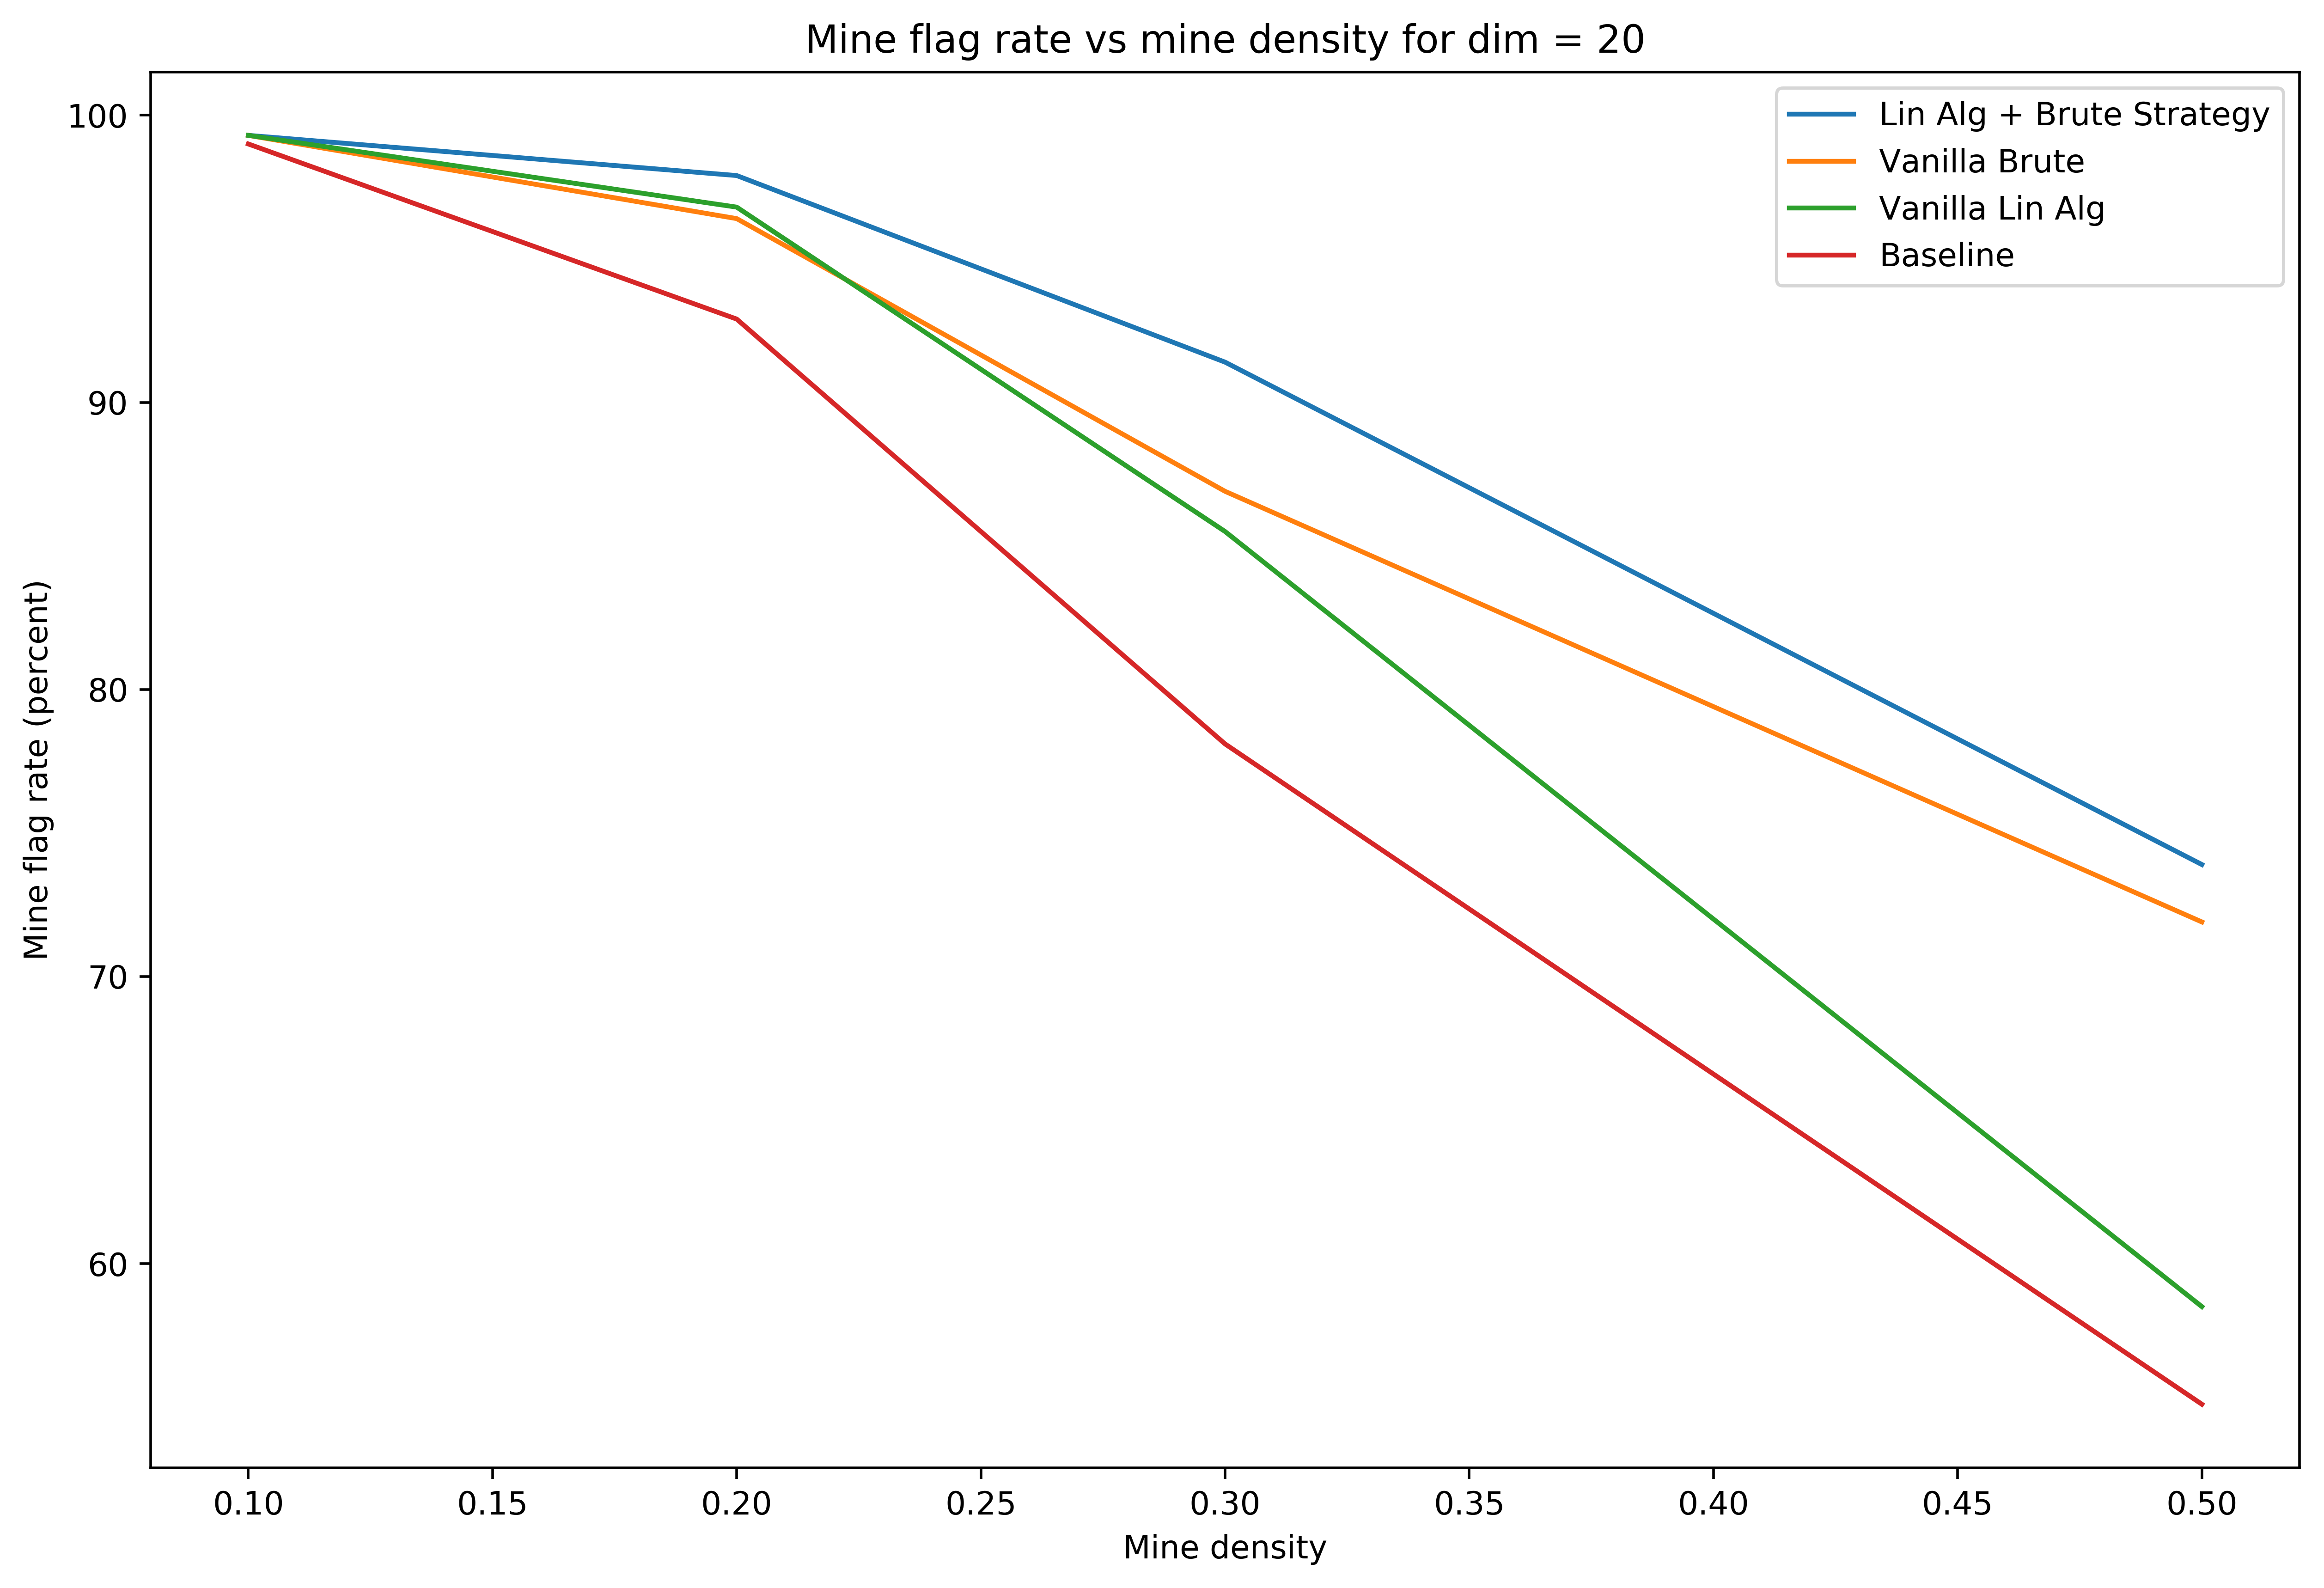

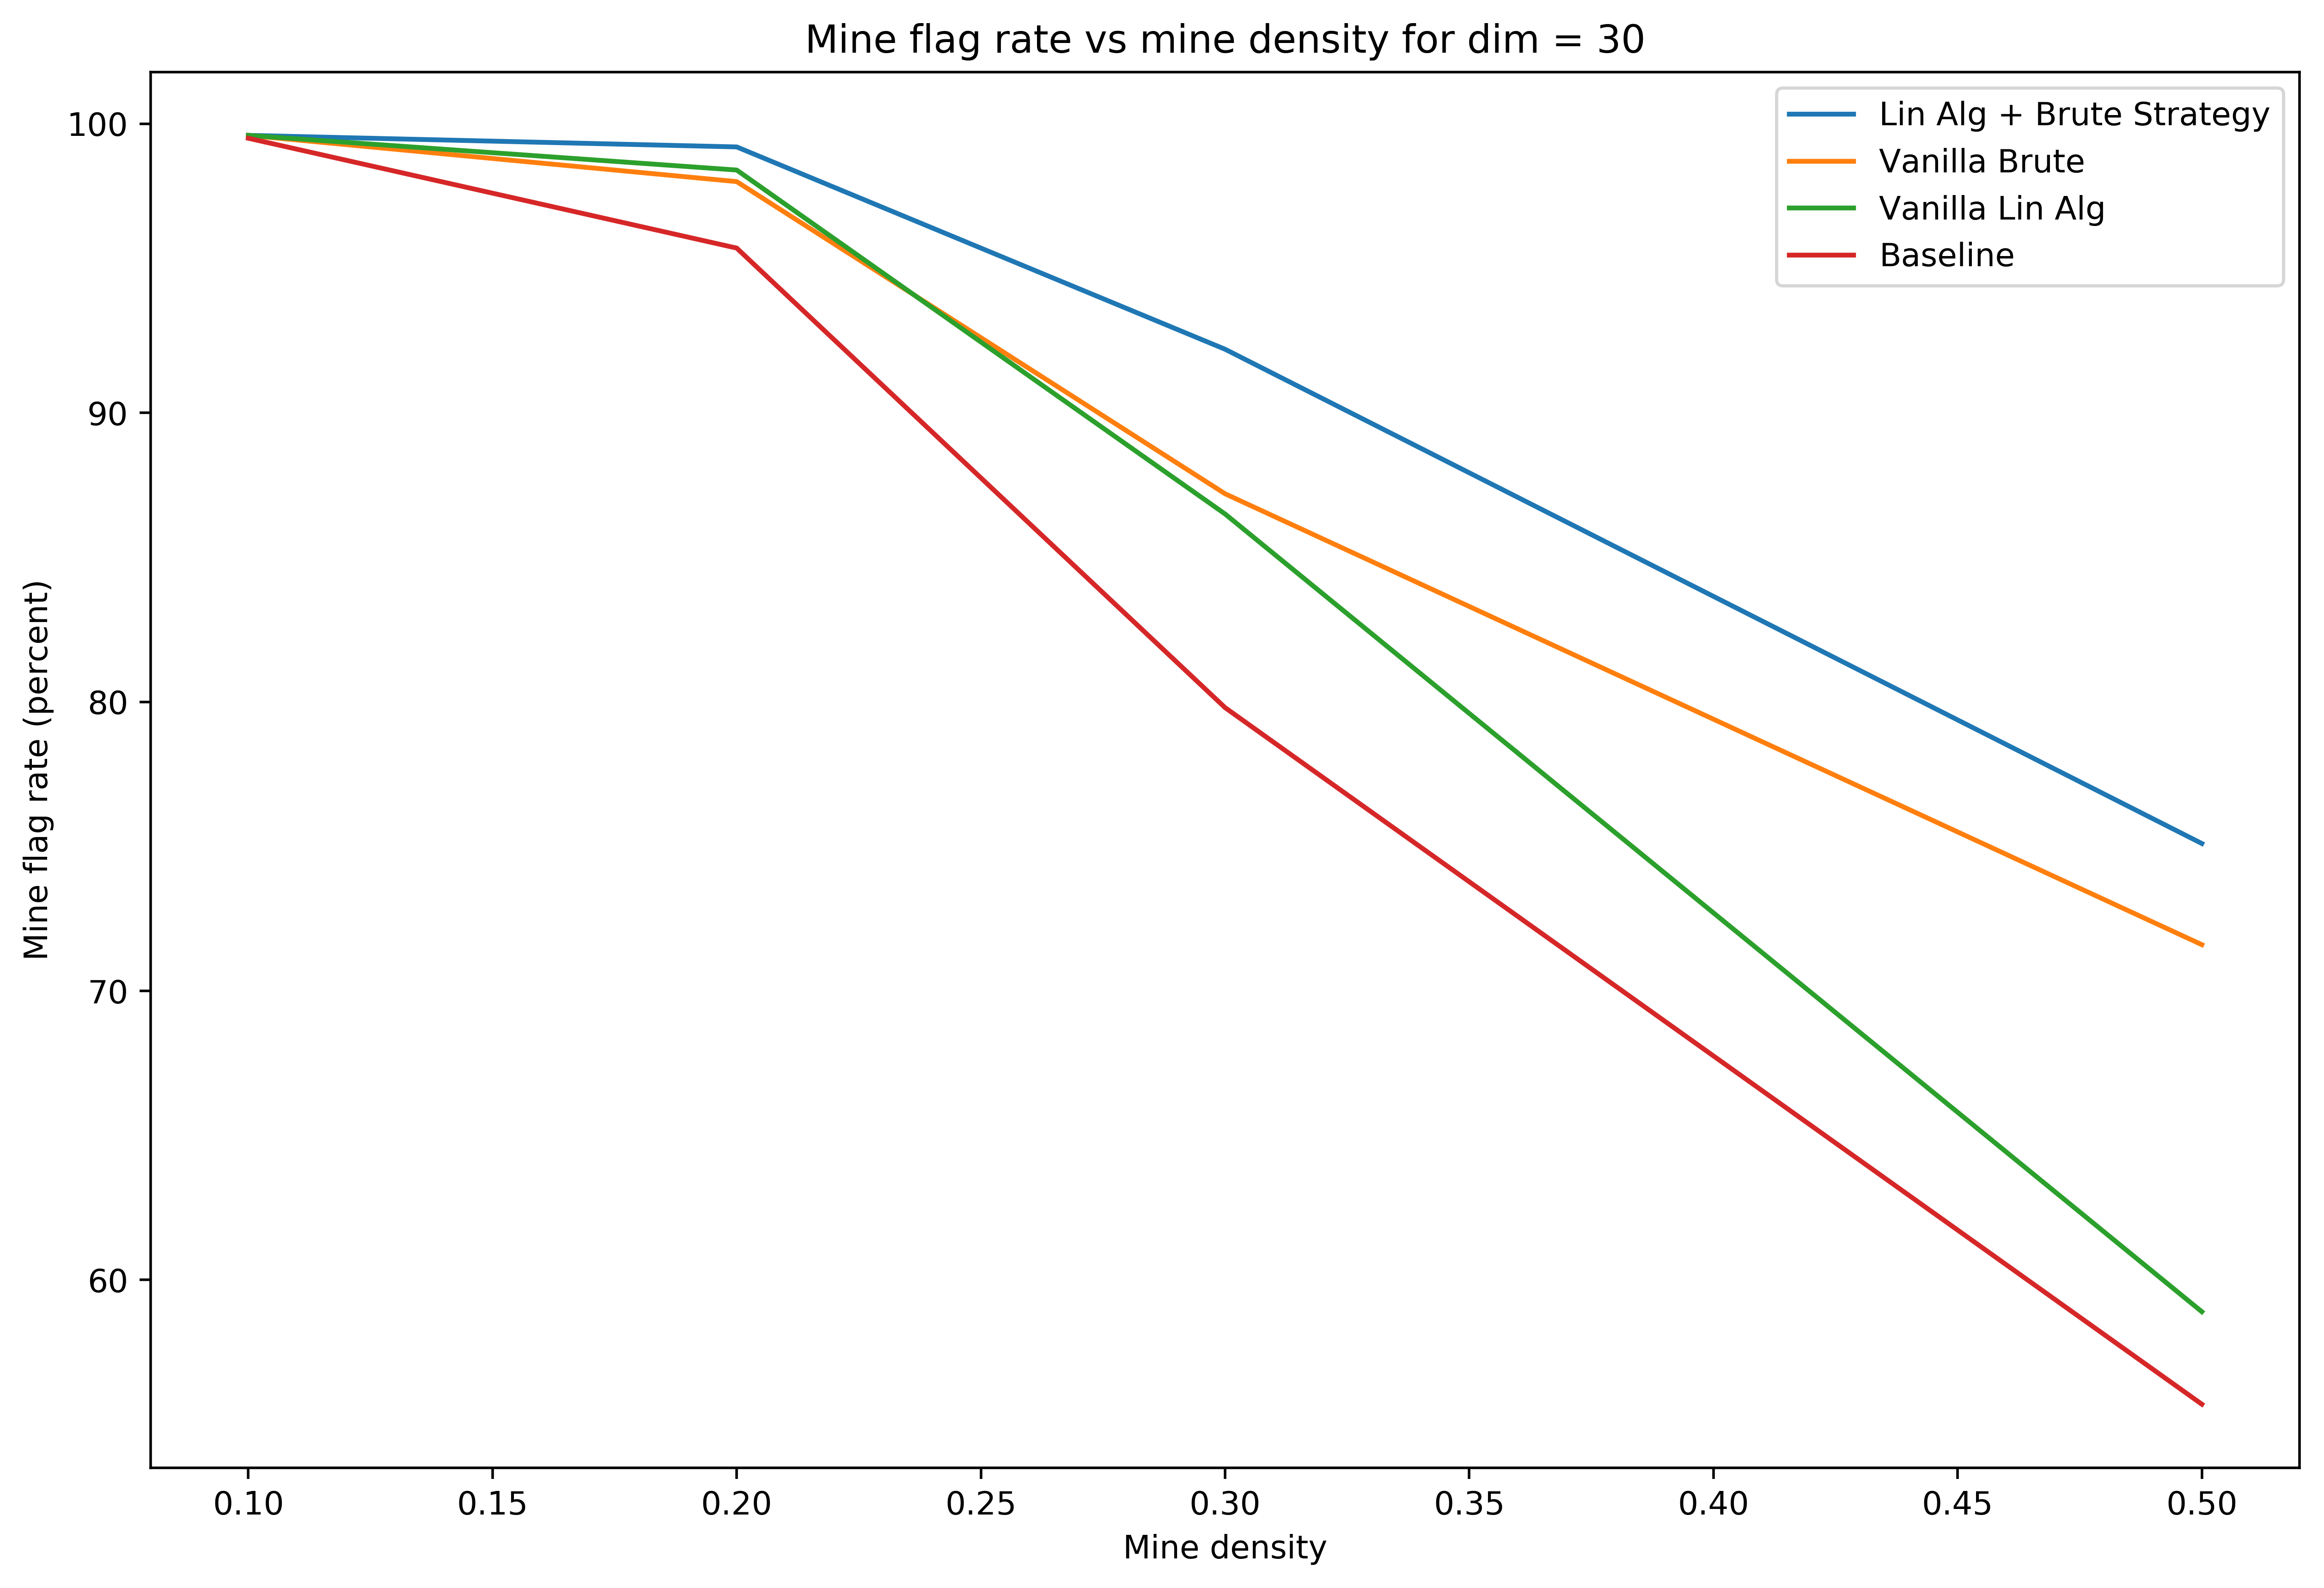

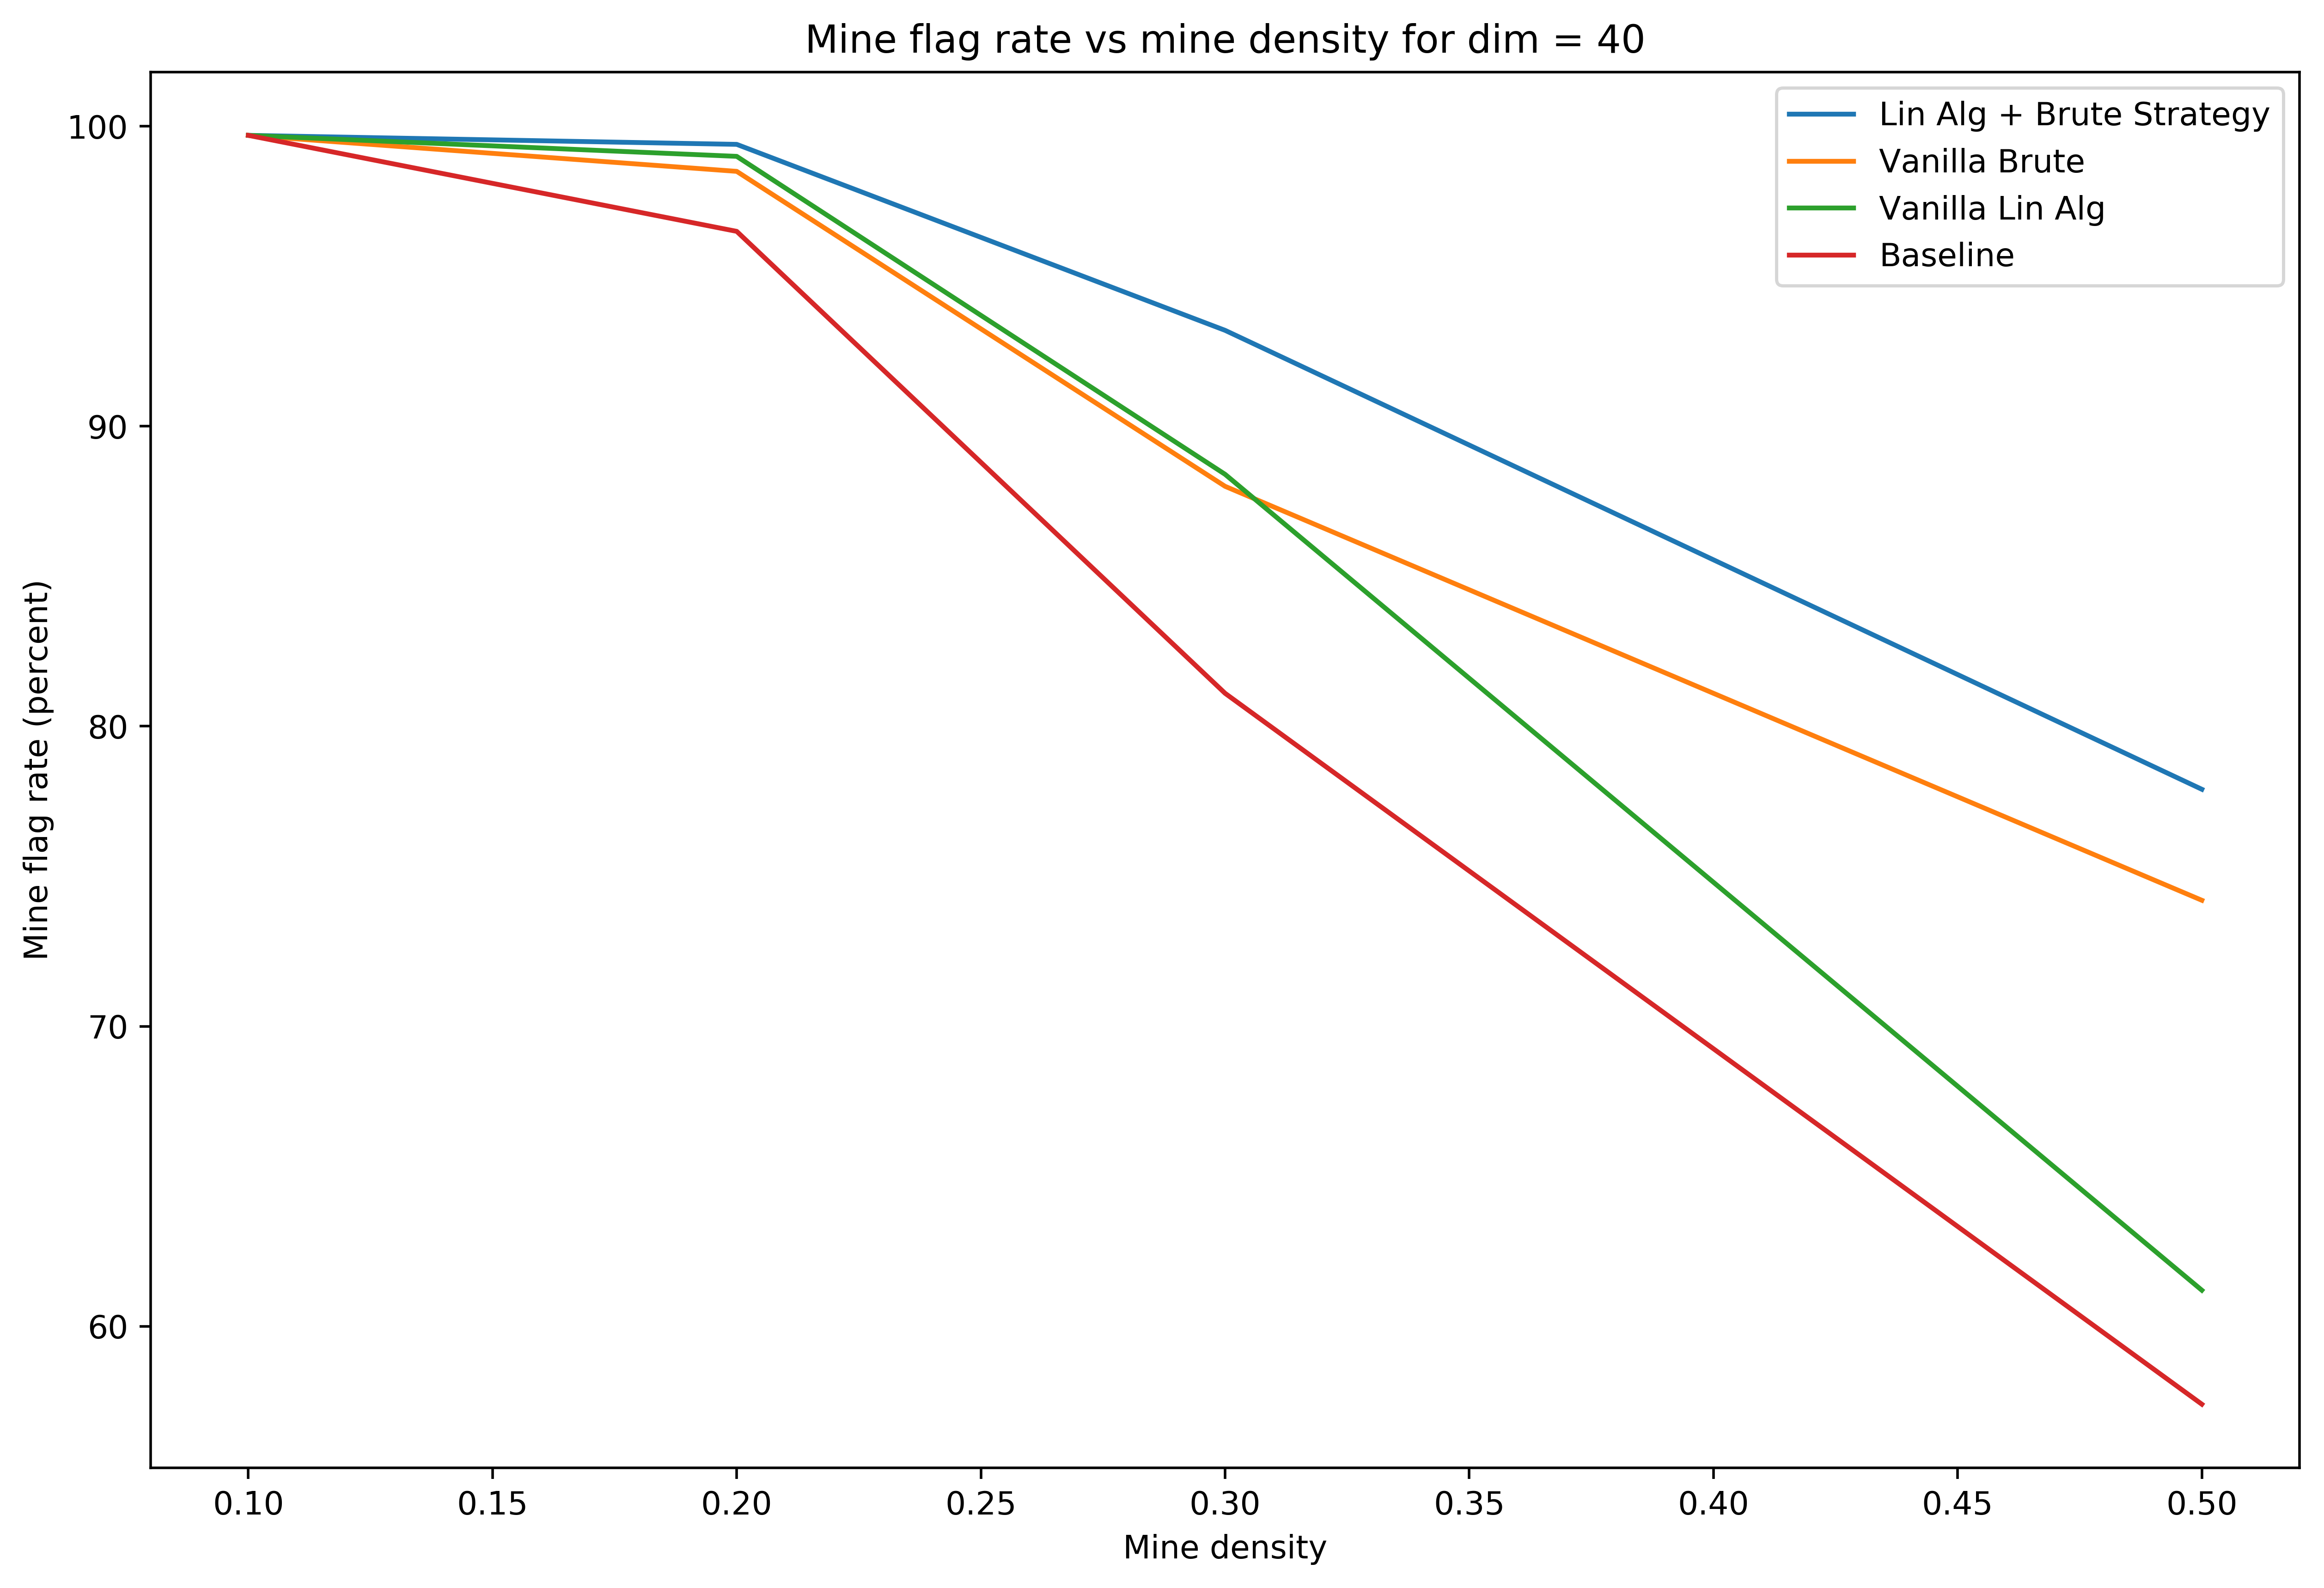

In [47]:
for dim in [10, 20, 30, 40]:
    plt.figure(figsize=(12,8), dpi=500)
    tmp = base_linalgBrute_df[base_linalgBrute_df['Dim'] == dim]
    
    plt.plot(tmp['Density'].values, tmp['Lin Alg + Brute'].values)
    plt.plot(tmp['Density'].values, tmp['Brute'].values)
    plt.plot(tmp['Density'].values, tmp['Lin Alg'].values)
    plt.plot(tmp['Density'].values, tmp['Baseline'].values)
    
    plt.legend(['Lin Alg + Brute Strategy', 'Vanilla Brute', 'Vanilla Lin Alg', 'Baseline'])
    
    plt.xlabel('Mine density')
    plt.ylabel('Mine flag rate (percent)')
    plt.title('Mine flag rate vs mine density for dim = {}'.format(dim))

    plt.savefig('./imgs/base_linalgBrute_dim{}.png'.format(dim))